# Load and import 

In [2]:
R.version.string
getwd()
library('dplyr')
library("DESeq2")
library('stringr')
library('EnhancedVolcano')
library('pheatmap')
library("vsn")
library('tidyr')
library('ggplot2')

[1] "R version 4.3.1 (2023-06-16)"

[1] "/media/HDD2/donghui/Pathogen_JC14_3DM"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘DESeq2’ was built under R version 4.3.2”
Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Loading required package: stats4

Warning message:
“package ‘stats4’ was built under R version 4.3.3”
Loading required package: BiocGenerics

Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”

Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, 

In [3]:
# Read the xlsx file
map_id_name <- readxl::read_excel("../gene_table_and_other_scripts/gene_table.xlsx")
map_id_name <- map_id_name %>% mutate(gene_name = gene_name %>% str_remove("'"))
sample_n(map_id_name, 2)

gene_id,gene_name
<chr>,<chr>
AT2G13295,AT2G13295
AT3G24310,MYB305


In [4]:
source('../gene_table_and_other_scripts/theme_Publication.R')

Registering fonts with R

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont(

### sample data

In [5]:
sample_data = readxl::read_excel("./refs//3-DM_shoots_root_JC14_adr1s_pathogen.xlsx") %>% as.data.frame
rownames(sample_data) <- sample_data$short_name 
sample_data

,short_name,sample_Names,genotype,tissue,DM,DAS,accession,media,replicate,Bam_name,ERS,ERR,group1,group2,group3,hpi,treatment,batch
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
DM1/DM2d_1,DM1/DM2d_1,DM1/DM2d_Shoot_1,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,1,DM2_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_1,Col-0_12_1,Col-0_Shoot_1,WT,Shoot,WT,12,Col-0,1/2MS,1,COL4_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_2,DM1/DM2d_2,DM1/DM2d_Shoot_2,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,2,DM6_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_2,Col-0_12_2,Col-0_Shoot_2,WT,Shoot,WT,12,Col-0,1/2MS,2,COL8_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_3,DM1/DM2d_3,DM1/DM2d_Shoot_3,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,3,DM14_SHO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
DM6/DM7_1,DM6/DM7_1,DM6/DM7_Shoot_1,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,1,12-LCH3315,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_1,Col-0_14_1,Col-0_Shoot_1,WT,Shoot,WT,14,Col-0,1/2MS,1,14-LCH3317,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2
DM6/DM7_2,DM6/DM7_2,DM6/DM7_Shoot_2,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,2,16-LCH3319,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_2,Col-0_14_2,Col-0_Shoot_2,WT,Shoot,WT,14,Col-0,1/2MS,2,18-LCH3321,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2


## Hisat2

In [6]:
# skip the first line, it is command of featurecount
pathogen_data <- read.table("..//RNA_seq_Pathogen/featureCounts//all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)
pathogen_data %>% sample_n(2)

Geneid,Chr,Start,End,Strand,Length,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.A.LFC7257_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.C.LFC7271_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.C.LFC7250_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.B.LFC7249_L3_sorted.bam,⋯,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.A.LFC7269_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.B.LFC7264_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.B.LFC7255_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.C.LFC7259_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.A.LFC7263_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M6.A.LFC7251_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.C.LFC7265_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.A.LFC7254_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S12.A.LFC7266_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R20.A.LFC7272_L2_sorted.bam
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AT3G20550,3;3;3;3;3;3;3;3;3;3;3,7174436;7174879;7175038;7175175;7175337;7175974;7176419;7176588;7176734;7177226;7177872,7174734;7174949;7175083;7175222;7175451;7176066;7176476;7176654;7176765;7177634;7178020,-;-;-;-;-;-;-;-;-;-;-,1387,640,864,754,797,⋯,951,891,516,644,957,799,899,898,915,884
AT1G62510,1,23136366,23137254,-,889,78,911,928,816,⋯,994,43,77,91,36,117,42,100,38,308


In [7]:
# skip the first line, it is command of featurecount
DM10_DM11_data <- read.table("../3DMs_pathogen/featureCounts/DM10_DM11_all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)

In [8]:
# skip the first line, it is command of featurecount
DM1_DM2d_data <- read.table("../3DMs_pathogen/featureCounts/DM1_DM2d_all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)

In [9]:
# skip the first line, it is command of featurecount
DM6_DM7_data <- read.table("../3DMs_pathogen/featureCounts/DM6_DM7_all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)

In [10]:
JC14_data <- read.table("../JC14_and_DMs//featureCounts/new_Col-0_JC14_all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)

In [11]:
data <- pathogen_data %>% select(-c( Chr, Start, End, Strand, Length)) %>% 
    full_join(DM10_DM11_data, by = 'Geneid') %>% select(-c( Chr, Start, End, Strand, Length)) %>%
    full_join(DM6_DM7_data, by = 'Geneid') %>% select(-c( Chr, Start, End, Strand, Length)) %>%
    full_join(DM1_DM2d_data, by = 'Geneid') %>% select(-c( Chr, Start, End, Strand, Length)) %>% 
    full_join(JC14_data, by = 'Geneid') %>% select(-c( Chr, Start, End, Strand, Length)) 

In [12]:
length(names(data))
names(data)

[1] 83

[1] "Geneid"                                                                          
 [2] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.A.LFC7257_L2_sorted.bam" 
 [3] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.C.LFC7271_L2_sorted.bam"
 [4] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.C.LFC7250_L3_sorted.bam"  
 [5] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.B.LFC7249_L3_sorted.bam"  
 [6] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R20.B.LFC7273_L2_sorted.bam"
 [7] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.B.LFC7258_L2_sorted.bam" 
 [8] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S20.A.LFC7275_L2_sorted.bam"
 [9] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S20.C.LFC7277_L3_sorted.bam"
[10] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S20.B.LFC7276_L2_sorted.bam"
[11] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.C.LFC7256_L2_sorted.bam" 
[12] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R20.C.LFC7274_L3_sorted.bam"
[13] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.A.LFC7248_L2_sorted.bam"  
[14] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M6.B.LFC7252_L2_sorted.bam" 
[15] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S12.C.LFC7268_L2_sorted.bam"
[16] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M6.C.LFC7253_L3_sorted.bam" 
[17] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M12.A.LFC7260_L2_sorted.bam"
[18] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M12.C.LFC7262_L2_sorted.bam"
[19] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.B.LFC7270_L2_sorted.bam"
[20] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M12.B.LFC7261_L3_sorted.bam"
[21] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S12.B.LFC7267_L2_sorted.bam"
[22] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.A.LFC7269_L3_sorted.bam"
[23] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.B.LFC7264_L3_sorted.bam"
[24] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.B.LFC7255_L2_sorted.bam" 
[25] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.C.LFC7259_L2_sorted.bam" 
[26] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.A.LFC7263_L2_sorted.bam"
[27] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M6.A.LFC7251_L2_sorted.bam" 
[28] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.C.LFC7265_L2_sorted.bam"
[29] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.A.LFC7254_L2_sorted.bam" 
[30] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S12.A.LFC7266_L3_sorted.bam"
[31] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R20.A.LFC7272_L2_sorted.bam"
[32] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138684_sorted.bam"                          
[33] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138674_sorted.bam"                          
[34] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138670_sorted.bam"                          
[35] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138668_sorted.bam"                          
[36] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138667_sorted.bam"                          
[37] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138669_sorted.bam"                          
[38] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138679_sorted.bam"                          
[39] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138681_sorted.bam"                          
[40] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138676_sorted.bam"                          
[41] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138671_sorted.bam"                          
[42] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138682_sorted.bam"                          
[43] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138672_sorted.bam"                          
[44] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138675_sorted.bam"                          
[45] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138673_sorted.bam"                          
[46] "X.media.HDD3.3DM.DM10_DM11.2_bam.ER

In [13]:
names(data) <- names(data) %>% 
    str_remove('X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.') %>%    
    str_remove('.LFC\\d{4}_L\\d{1,2}_sorted.bam') %>% str_remove('X.media.HDD3.3DM.') %>%
     str_remove('DM10_DM11.2_bam.') %>% str_remove('DM6_DM7.2_bam.') %>%
     str_remove('DM1_DM2d.2_bam.') %>% str_remove('_sorted.bam') %>% str_replace_all('\\.', '-') %>% str_remove('_L4') %>%
    str_remove('X-media-HDD3-JC14-2_bam-') %>% str_remove('-LFD\\d{4,5}_L2$') %>% str_remove('X-media-HDD3-new_JC14_Col0-2_bam-') %>% str_remove('-LGD75\\d{2}_L1') %>% str_replace_all('C-JC14-12D', 'CJ')
names(data)

[1] "Geneid"     "S6-A"       "M20-C"      "C-C"        "C-B"       
 [6] "R20-B"      "S6-B"       "S20-A"      "S20-C"      "S20-B"     
[11] "R6-C"       "R20-C"      "C-A"        "M6-B"       "S12-C"     
[16] "M6-C"       "M12-A"      "M12-C"      "M20-B"      "M12-B"     
[21] "S12-B"      "M20-A"      "R12-B"      "R6-B"       "S6-C"      
[26] "R12-A"      "M6-A"       "R12-C"      "R6-A"       "S12-A"     
[31] "R20-A"      "ERR4138684" "ERR4138674" "ERR4138670" "ERR4138668"
[36] "ERR4138667" "ERR4138669" "ERR4138679" "ERR4138681" "ERR4138676"
[41] "ERR4138671" "ERR4138682" "ERR4138672" "ERR4138675" "ERR4138673"
[46] "ERR4138678" "ERR4138683" "ERR4138680" "ERR4138677" "17-LCH3320"
[51] "14-LCH3317" "27-LCH3324" "11-LCH3314" "15-LCH3318" "21-LCH3322"
[56] "16-LCH3319" "18-LCH3321" "22-LCH3323" "28-LCH3325" "12-LCH3315"
[61] "13-LCH3316" "COL7_ROO"   "DM5_ROOT"   "DM1_ROOT"   "COL3_ROO"  
[66] "DM6_SHOO"   "DM13_ROO"   "DM2_SHOO"   "COL4_SHO"   "DM14_SHO"  
[71] "COL8_SHO"   "C12-2"      "OJ-2"       "DJ-3"       "DJ-2"      
[76] "OJ-3"       "OJ-1"       "C14-1"      "C12-1"      "DJ-1"      
[81] "CJ-1"       "CJ-2"       "CJ-3"

 <font size="4"><span style="color:blue">
    the naming:  
               S is Rps4, M is Mock, C is control, R is Rpt2  
</span></font>

In [14]:
countData <- data %>% dplyr::select ( sample_data$Bam_name)
rownames(countData) <- data$Geneid
head(countData)

,DM2_SHOO,COL4_SHO,DM6_SHOO,COL8_SHO,DM14_SHO,12-LCH3315,14-LCH3317,16-LCH3319,18-LCH3321,22-LCH3323,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AT1G30814,90,4,129,0,96,71,0,158,0,78,⋯,48,0,0,0,210,208,196,224,179,143
AT1G78930,209,402,111,462,168,383,369,372,331,410,⋯,850,461,619,650,301,202,274,259,312,289
AT1G71695,1568,10440,1412,12570,1578,4176,13325,2848,13770,4118,⋯,4132,4491,4511,4365,2924,2886,2595,3360,3005,3381
AT1G58983,18,7,9,4,9,29,32,28,36,35,⋯,63,67,51,65,34,33,18,32,28,46
AT1G12980,6,13,6,2,22,20,4,29,0,30,⋯,12,0,0,5,10,4,0,10,12,13
AT1G45223,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [15]:
all (names(countData) == sample_data$Bam_name)

[1] TRUE

In [16]:
names(countData) <- sample_data$short_name
sample_data <- sample_data %>% dplyr::rename('group' = 'group3')
rownames(sample_data) <- sample_data$short_name

In [17]:
all (names(countData) == rownames(sample_data))

[1] TRUE

## remove root samples, only keep shoot sample

In [18]:
sample_data <- sample_data %>% filter(tissue == 'Shoot')
countData <- countData %>% select(rownames(sample_data))
all (names(countData) == rownames(sample_data))

[1] TRUE

In [19]:
countData

,DM1/DM2d_1,Col-0_12_1,DM1/DM2d_2,Col-0_12_2,DM1/DM2d_3,DM6/DM7_1,Col-0_14_1,DM6/DM7_2,Col-0_14_2,DM6/DM7_3,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AT1G30814,90,4,129,0,96,71,0,158,0,78,⋯,48,0,0,0,210,208,196,224,179,143
AT1G78930,209,402,111,462,168,383,369,372,331,410,⋯,850,461,619,650,301,202,274,259,312,289
AT1G71695,1568,10440,1412,12570,1578,4176,13325,2848,13770,4118,⋯,4132,4491,4511,4365,2924,2886,2595,3360,3005,3381
AT1G58983,18,7,9,4,9,29,32,28,36,35,⋯,63,67,51,65,34,33,18,32,28,46
AT1G12980,6,13,6,2,22,20,4,29,0,30,⋯,12,0,0,5,10,4,0,10,12,13
AT1G45223,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AT1G56250,308,201,185,603,328,152,80,50,36,109,⋯,136,24,2,28,476,438,436,196,237,266
AT1G66852,0,0,0,0,2,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AT1G69810,664,117,603,131,550,836,199,1606,113,1158,⋯,299,110,88,87,1166,1412,1282,760,846,760


In [20]:
sample_data %>% saveRDS('./Rdata/sample_data_3DM_shoots_DMs_JC14_adr1s_pathogen.rds')

## build dds

In [21]:
## construct dds

# put the variable of interest at the end of formula so res function will take condition by default
dds <- DESeqDataSetFromMatrix(countData, colData=sample_data, design= ~  batch + group) 
dds <- dds[ rowSums(counts(dds)) > 5, ]

dds <- DESeq(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a mess

### salmon quants files

In [22]:
res_AvrRpt2_vs_Control <- results(dds, contrast = c('group','AvrRps4-20h', 'Mock-20h'))  


In [23]:
# Estimate Dispersion Trend?
vsd <- vst(dds)

In [24]:
counts_df <- dds %>% counts %>% as.data.frame

In [25]:
counts_df %>% names()

[1] "DM1/DM2d_1"  "Col-0_12_1"  "DM1/DM2d_2"  "Col-0_12_2"  "DM1/DM2d_3" 
 [6] "DM6/DM7_1"   "Col-0_14_1"  "DM6/DM7_2"   "Col-0_14_2"  "DM6/DM7_3"  
[11] "Col-0_14_3"  "DM10/DM11_6" "DM10/DM11_5" "DM10/DM11_4" "DM10/DM11_3"
[16] "DM10/DM11_2" "DM10/DM11_1" "Tuescha-9_6" "Tuescha-9_5" "Tuescha-9_4"
[21] "Tuescha-9_3" "Tuescha-9_2" "Tuescha-9_1" "Cdm-0_6"     "Cdm-0_5"    
[26] "Cdm-0_4"     "Cdm-0_3"     "Cdm-0_2"     "Cdm-0_1"     "C12-1"      
[31] "C12-2"       "C14-1"       "DJ-1"        "DJ-2"        "DJ-3"       
[36] "CJ-1"        "CJ-2"        "CJ-3"        "OJ-1"        "OJ-2"       
[41] "OJ-3"        "C-A"         "C-B"         "C-C"         "M6-A"       
[46] "M6-B"        "M6-C"        "R6-A"        "R6-B"        "R6-C"       
[51] "S6-A"        "S6-B"        "S6-C"        "M12-A"       "M12-B"      
[56] "M12-C"       "R12-A"       "R12-B"       "R12-C"       "S12-A"      
[61] "S12-B"       "S12-C"       "M20-A"       "M20-B"       "M20-C"      
[66] "R20-A"       "R20-B"       "R20-C"       "S20-A"       "S20-B"      
[71] "S20-C"

### output tsv for diffTF

In [26]:
library(dplyr)

counts_df_DM1_DM2d <- counts_df %>% 
  select(matches("DM1/DM2d|Col-0_12|C12")) %>%   
  rename_with(~ gsub("DM1/DM2d", "DM1-DM2d", .), starts_with("DM1/DM2d")) %>%
  rename_with(~ gsub("Col-0_12", "C12", .), starts_with("Col-0_12")) %>% 
    tibble::rownames_to_column('ENSEMBL') %>%rowwise() %>%  # Add this to ensure row-wise operations
  mutate(C12_3 = as.integer(mean(c(`C12-1`, `C12-2`)))) %>% as.data.frame %>% select( - c(`C12-1`, `C12-2`))

counts_df_DM1_DM2d %>% sample_n(10)

ENSEMBL,DM1-DM2d_1,C12_1,DM1-DM2d_2,C12_2,DM1-DM2d_3,C12_3
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
AT3G27360,32,81,18,69,49,287
AT2G45480,2,226,4,178,7,144
AT1G73480,3678,2568,3275,728,3076,1277
AT2G07775,428,279,364,204,342,1
AT5G01775,89,90,82,92,78,24
AT3G27620,24,26,14,31,8,17
AT3G58170,4458,1870,3854,2090,3927,761
AT1G25350,9020,5700,8684,5670,8238,4056
AT5G39980,429,1399,349,1444,379,568


In [27]:
counts_df_DM1_DM2d %>% select( -ENSEMBL)%>%
  summarise(across(everything(), sum, na.rm = TRUE))

Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(everything(), sum, na.rm = TRUE)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


DM1-DM2d_1,C12_1,DM1-DM2d_2,C12_2,DM1-DM2d_3,C12_3
<int>,<int>,<int>,<int>,<int>,<int>
104369815,89792169,94838409,86880250,93548926,38759461


In [28]:
counts_df_DM1_DM2d

ENSEMBL,DM1-DM2d_1,C12_1,DM1-DM2d_2,C12_2,DM1-DM2d_3,C12_3
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
AT1G30814,90,4,129,0,96,0
AT1G78930,209,402,111,462,168,240
AT1G71695,1568,10440,1412,12570,1578,6020
AT1G58983,18,7,9,4,9,41
AT1G12980,6,13,6,2,22,18
AT1G56250,308,201,185,603,328,20
AT1G66852,0,0,0,0,2,0
AT1G69810,664,117,603,131,550,49
AT1G72450,4899,3987,4077,2970,4207,1770


In [29]:
counts_df_DM6_DM7 <- counts_df %>%
  select(matches("DM6/DM7|Col-0_14")) %>%
  rename_with(~ gsub("DM6/DM7", "DM6-DM7", .), starts_with("DM6/DM7")) %>%
  rename_with(~ gsub("Col-0_14", "C14", .), starts_with("Col-0_14")) %>% tibble::rownames_to_column('ENSEMBL')
counts_df_DM6_DM7

ENSEMBL,DM6-DM7_1,C14_1,DM6-DM7_2,C14_2,DM6-DM7_3,C14_3
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
AT1G30814,71,0,158,0,78,6
AT1G78930,383,369,372,331,410,227
AT1G71695,4176,13325,2848,13770,4118,16683
AT1G58983,29,32,28,36,35,17
AT1G12980,20,4,29,0,30,8
AT1G56250,152,80,50,36,109,35
AT1G66852,0,0,0,0,0,0
AT1G69810,836,199,1606,113,1158,106
AT1G72450,7472,6953,6501,8467,6921,6937


In [30]:
mean(counts_df_DM6_DM7 %>% pull(ENSEMBL) %>% unique == ( counts_df_DM1_DM2d  %>% pull(ENSEMBL) %>% unique))

[1] 1

In [31]:
count_df_2DMs <- counts_df_DM1_DM2d %>% left_join(counts_df_DM6_DM7, by = 'ENSEMBL')

In [32]:
vst <- vst(dds) %>% assay()
vst %>% str

 num [1:27304, 1:71] 6.48 7.35 9.95 5.34 4.9 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:27304] "AT1G30814" "AT1G78930" "AT1G71695" "AT1G58983" ...
  ..$ : chr [1:71] "DM1/DM2d_1" "Col-0_12_1" "DM1/DM2d_2" "Col-0_12_2" ...


In [33]:
vst

,DM1/DM2d_1,Col-0_12_1,DM1/DM2d_2,Col-0_12_2,DM1/DM2d_3,DM6/DM7_1,Col-0_14_1,DM6/DM7_2,Col-0_14_2,DM6/DM7_3,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
AT1G30814,6.478812,4.856982,6.904421,4.274813,6.579144,6.085754,4.274813,6.624010,4.274813,6.093728,⋯,6.250799,4.274813,4.274813,4.274813,7.989834,7.953261,7.982295,8.055876,7.733246,7.498956
AT1G78930,7.352199,8.486939,6.750785,8.738315,7.154988,7.809582,7.873663,7.544792,7.712172,7.790199,⋯,9.622628,8.783241,9.226936,9.290609,8.445505,7.917223,8.405448,8.238536,8.426687,8.362349
AT1G71695,9.952630,13.032360,9.906953,13.375682,10.019656,11.022893,12.807287,10.213027,12.819006,10.884102,⋯,11.847395,11.951928,12.011185,11.961523,11.579093,11.531951,11.498687,11.760990,11.546111,11.751981
AT1G58983,5.335130,5.041145,5.059883,4.872483,5.048491,5.474792,5.585990,5.351526,5.644242,5.535099,⋯,6.494291,6.542624,6.326952,6.547236,6.095093,6.055243,5.678083,6.037763,5.906187,6.330166
AT1G12980,4.896048,5.309172,4.918408,4.698929,5.464949,5.279869,4.752321,5.369725,4.274813,5.446591,⋯,5.318926,4.274813,4.274813,4.965654,5.306660,4.929148,4.274813,5.301032,5.373846,5.431042
AT1G56250,7.808375,7.624751,7.295473,9.092883,7.936517,6.776507,6.259751,5.689849,5.644242,6.378804,⋯,7.288450,5.715608,4.714629,5.846434,9.049270,8.911357,9.015945,7.890802,8.077514,8.256471
AT1G66852,4.274813,4.274813,4.274813,4.274813,4.642915,4.274813,4.274813,4.274813,4.274813,4.274813,⋯,4.274813,4.274813,4.274813,4.274813,4.274813,4.274813,4.274813,4.274813,4.274813,4.274813
AT1G69810,8.785475,7.014269,8.753114,7.194985,8.593129,8.803200,7.155355,9.421715,6.549942,9.125838,⋯,8.235159,7.044030,6.848445,6.834818,10.279689,10.519987,10.500789,9.669860,9.763714,9.652606
AT1G72450,11.557855,11.654320,11.398710,11.311039,11.400768,11.850462,11.875954,11.377366,12.122216,11.621218,⋯,14.020919,11.940430,11.913538,11.652025,14.274250,14.331495,14.355469,14.146697,14.227435,14.000868
AT1G76280,9.547669,10.327892,9.585016,10.487979,9.728845,9.320024,9.978496,9.501800,9.760160,9.181698,⋯,9.825765,10.427948,10.388211,10.312547,9.452097,9.450089,9.183841,9.595571,9.583245,9.527965


##### output for WGCNA

In [34]:
##output for WGCNA
varianceStabilizingTransformation(dds, blind=F) %>% assay %>% saveRDS('./Rdata/new_for_WGCNA_vst.Rds')

In [35]:
assay_vsd <- varianceStabilizingTransformation(dds, blind=F) %>% assay
z_assay <- ( assay_vsd - mean(assay_vsd) ) / sd(assay_vsd)

In [36]:
z_assay

,DM1/DM2d_1,Col-0_12_1,DM1/DM2d_2,Col-0_12_2,DM1/DM2d_3,DM6/DM7_1,Col-0_14_1,DM6/DM7_2,Col-0_14_2,DM6/DM7_3,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
AT1G30814,-0.64815080,-0.99291693,-0.54256136,-1.10497377,-0.62398876,-0.73890604,-1.10497377,-0.61304334,-1.10497377,-0.73712250,⋯,-0.70151962,-1.10497377,-1.10497377,-1.10497377,-0.23142775,-0.24299099,-0.23381786,-0.210347749,-0.31090337,-0.38016640
AT1G78930,-0.42199152,-0.06639633,-0.58162953,0.02264356,-0.47636729,-0.28765918,-0.26788609,-0.36685951,-0.31726118,-0.29359300,⋯,0.36446592,0.03894831,0.20619921,0.23110467,-0.08071321,-0.25430823,-0.09445763,-0.150699184,-0.08718187,-0.10913869
AT1G71695,0.50250034,1.96233175,0.48308626,2.13552782,0.53116045,0.98162091,1.84938397,0.61495542,1.85525197,0.91718402,⋯,1.37500205,1.42595260,1.45492410,1.43063962,1.24522741,1.22258564,1.20664004,1.333046694,1.22938116,1.32868077
AT1G58983,-0.89813494,-0.95684050,-0.95314309,-0.98989725,-0.95539158,-0.86964331,-0.84663167,-0.89481228,-0.83445169,-0.85720116,⋯,-0.64445103,-0.63283327,-0.68392493,-0.63171972,-0.73681698,-0.74571055,-0.82733397,-0.749594373,-0.77850040,-0.68317745
AT1G12980,-0.98530104,-0.90338398,-0.98093347,-1.02356212,-0.87166569,-0.90929284,-1.01323715,-0.89111735,-1.10497377,-0.87543181,⋯,-0.90141314,-1.10497377,-1.10497377,-0.97168396,-0.90389108,-0.97883351,-1.10497377,-0.905027081,-0.89027977,-0.87861547
AT1G56250,-0.28802932,-0.34336390,-0.43784406,0.15449453,-0.24825873,-0.57516612,-0.69946295,-0.82485195,-0.83445169,-0.67181507,⋯,-0.43979452,-0.81940487,-1.02052867,-0.79144357,0.13788891,0.08608885,0.12527279,-0.262556878,-0.20338526,-0.14473556
AT1G66852,-1.10497377,-1.10497377,-1.10497377,-1.10497377,-1.03436831,-1.10497377,-1.10497377,-1.10497377,-1.10497377,-1.10497377,⋯,-1.10497377,-1.10497377,-1.10497377,-1.10497377,-1.10497377,-1.10497377,-1.10497377,-1.104973769,-1.10497377,-1.10497377
AT1G69810,0.03976214,-0.51392953,0.02800118,-0.46550504,-0.02923801,0.04622953,-0.47626780,0.28307515,-0.63106569,0.16711270,⋯,-0.15182001,-0.50606911,-0.55692527,-0.56039921,0.64421071,0.75113927,0.74251516,0.383897933,0.42283852,0.37678639
AT1G72450,1.23502080,1.28146079,1.15887157,1.11718581,1.15985242,1.37649413,1.38890188,1.14870540,1.50937419,1.26550199,⋯,2.46333632,1.42033844,1.40721690,1.28035395,2.59266711,2.62193095,2.63419106,2.527511436,2.56874480,2.45311316
AT1G76280,0.33385702,0.66547821,0.34907167,0.73676797,0.40832108,0.24268490,0.51353664,0.31526822,0.42135602,0.18863935,⋯,0.44881822,0.70991854,0.69222197,0.65869743,0.29524872,0.29444292,0.18946856,0.353384634,0.34834882,0.32585871


## PCA plot

In [37]:
library(PCAtools)
p <- PCAtools::pca(vst, metadata = sample_data, removeVar = 0.1)

Warning message:
“package ‘PCAtools’ was built under R version 4.3.2”

Attaching package: ‘PCAtools’


The following objects are masked from ‘package:stats’:

    biplot, screeplot


-- removing the lower 10% of variables based on variance



In [38]:
sample_data

,short_name,sample_Names,genotype,tissue,DM,DAS,accession,media,replicate,Bam_name,ERS,ERR,group1,group2,group,hpi,treatment,batch
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
DM1/DM2d_1,DM1/DM2d_1,DM1/DM2d_Shoot_1,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,1,DM2_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_1,Col-0_12_1,Col-0_Shoot_1,WT,Shoot,WT,12,Col-0,1/2MS,1,COL4_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_2,DM1/DM2d_2,DM1/DM2d_Shoot_2,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,2,DM6_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_2,Col-0_12_2,Col-0_Shoot_2,WT,Shoot,WT,12,Col-0,1/2MS,2,COL8_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_3,DM1/DM2d_3,DM1/DM2d_Shoot_3,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,3,DM14_SHO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
DM6/DM7_1,DM6/DM7_1,DM6/DM7_Shoot_1,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,1,12-LCH3315,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_1,Col-0_14_1,Col-0_Shoot_1,WT,Shoot,WT,14,Col-0,1/2MS,1,14-LCH3317,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2
DM6/DM7_2,DM6/DM7_2,DM6/DM7_Shoot_2,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,2,16-LCH3319,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_2,Col-0_14_2,Col-0_Shoot_2,WT,Shoot,WT,14,Col-0,1/2MS,2,18-LCH3321,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2


In [39]:
options(repr.plot.width=10, repr.plot.height=10, repr.plot.res = 100)
# options(jupyter.plot_mimetypes = "image/svg+xml") 
options(jupyter.plot_mimetypes = "image/png") 
screeplot <- screeplot(p, axisLabSize = 8, titleLabSize = 22)  
screeplot %>%  ggsave(file = paste0("./plots/screeplot", Sys.time(), ".pdf") , width = 10, height = 6)

In [40]:
options(repr.plot.width=12, repr.plot.height=12, repr.plot.res = 100)
biplot(p, showLoadings = TRUE,
    labSize = 5, pointSize = 5, sizeLoadingsNames = 5) %>% 
    ggsave(file = paste0("./plots/biplot_PCA_loading", Sys.time(), ".pdf") , width = 12, height = 12)

Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [41]:
biplot(p, #showLoadings = TRUE, 
       x = 'PC2', y = 'PC3',
    labSize = 5, pointSize = 5, sizeLoadingsNames = 5) %>%
    ggsave(file = paste0("./plots/biplot_PCA_2_3_", Sys.time(), ".pdf") , width = 12, height = 12)

In [42]:
p_for_plot <- p$rotated %>% cbind(p$metadata) 

In [43]:
p_for_plot <- p_for_plot %>% mutate(shape_group = group2 %>% str_remove('-\\d{1,2}h$'))

In [44]:
p_for_plot <- p_for_plot %>%
  mutate(group = ifelse(group1 == "control", "Col-0_12", group))
# p_for_plot

In [45]:
p_for_plot$group %>% unique

[1] "DM1/DM2d"          "Col-0_12"          "DM6/DM7"          
 [4] "Col-0_14"          "DM10/DM11"         "Parents_DM10_DM11"
 [7] NA                  "Mock-6h"           "AvrRpt2-6h"       
[10] "AvrRps4-6h"        "Mock-12h"          "AvrRpt2-12h"      
[13] "AvrRps4-12h"       "Mock-20h"          "AvrRpt2-20h"      
[16] "AvrRps4-20h"

In [46]:
custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#FB61D7', 'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00A9FF',
  "control" = "#72A063",
  "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
  "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
  "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
  'DM6/DM7_adr1s' = '#ffc14d', 'DM1/DM2d_adr1s' = '#2a6fdb', 'Col-0_adr1s' = '#ddacf5'
)

custom_shapes <- c(
  'control' = 16, 'Mock' = 18, 'AvrRps4' = 17, 'AvrRpt2' = 17, 
  "DM6/DM7" = 16, 'DM1/DM2d' = 16, 'DM10/DM11' = 16,
  'Col-0_12' = 16, 'Col-0_14' = 16,
  'Tuescha-9' = 16, 'Cdm-0' = 16, 'Tuescha-9' = 16, 'Cdm-0' = 16, 
  'DM6/DM7_adr1s' = 16, 'DM1/DM2d_adr1s' = 16, 'Col-0_adr1s' = 16
)

Warning message:
“package ‘grid’ was built under R version 4.3.3”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Duplicated `override.aes` is ignored.”
Warning message:
“Duplicated `override.aes` is ignored.”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


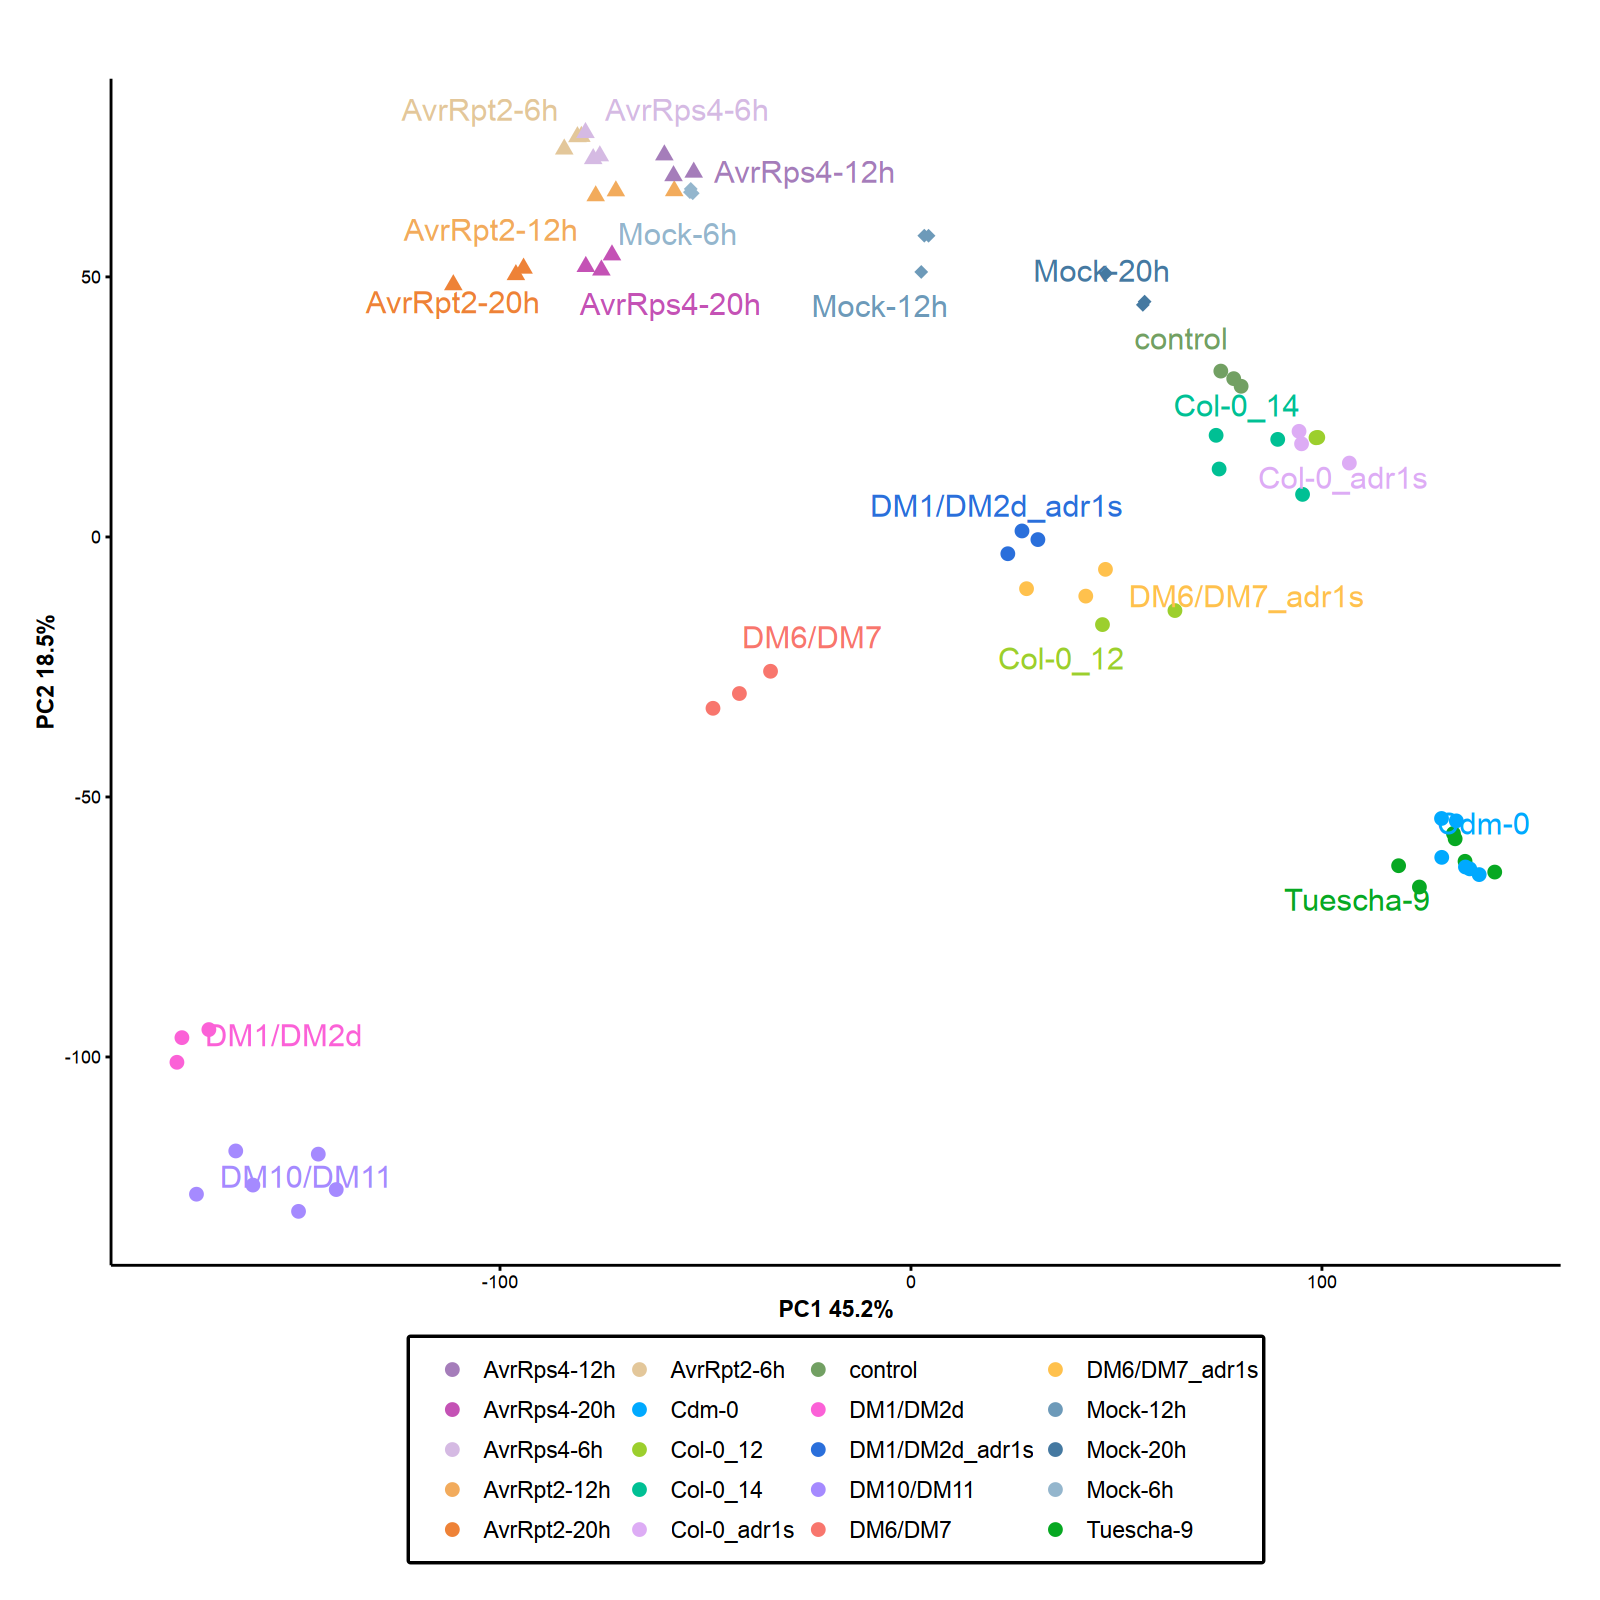

In [47]:
library(ggplot2)
library(ggrepel)
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 200)


# Create a new data frame with only one row per group
unique_group_data <- p_for_plot %>%
  group_by(group2) %>%
  slice_head(n = 1) %>%
  ungroup()

# Create PCA plot
pca_gg <- ggplot(p_for_plot, aes(PC1, PC2, fill = group2, color = group2, shape = shape_group)) + 
  # Add jittered points
  geom_jitter(size = 2, width = 0.05) + 
  # Add x-axis label
  xlab(paste0("PC1 ", round(p$variance[1], 1), "%")) + 
  # Add y-axis label
  ylab(paste0("PC2 ", round(p$variance[2], 1), "%")) + 
  # Apply publication theme
  theme_Publication() +
  # Add repel labels without "a" character
  geom_label_repel(aes(label = group2), data = unique_group_data,
                    segment.color = NA, fill = NA, label.size = 0, show.legend = FALSE) +
  # Customize shape legend
  scale_shape_manual(values = custom_shapes, name = "Group", guide = guide_none()) + 
  # Customize fill legend
  scale_fill_manual(values = custom_colors, name = NULL) + 
  # Customize color legend
  scale_color_manual(values = custom_colors, name = NULL) +
  # Apply publication theme again
  theme_Publication() +
  # Set legend aesthetics
  guides(fill = guide_legend(override.aes = list(shape = 16), ncol = 4, title = NULL),
         color = guide_legend(override.aes = list(shape = 16), ncol = 4, title = NULL)) +
  # Customize legend text size, key size, and add a border
  theme(
        legend.title = element_text(size = 8),
        legend.text = element_text(size = 8),
        legend.key.size = unit(1, "lines"),
        legend.box.background = element_rect(color = "black", size = 1)) +
  # Set legend position
  # theme(legend.position = c(0.62, 0.13)) 
  theme(legend.position = 'bottom')

# Show the plot
print(pca_gg)

# Save the plot
pca_gg %>% ggsave(file = paste0("./plots/PCA_PC1_PC2_", Sys.time(), ".pdf") , width = 6, height = 6)



In [48]:
pc2_pc3 <- ggplot(p_for_plot, aes(PC2, PC3, fill = group,color = group, shape = shape_group)) + 
  geom_jitter(size = 5, width = 0.05) + 
  xlab(paste0("PC2 ", round(p$variance[2], 1), "%")) + 
  ylab(paste0("PC3 ", round(p$variance[3], 1), "%")) + 
  theme_Publication() +
geom_label_repel(aes(label = group), data = unique_group_data, fill = NA, label.size = 0) +
  scale_shape_manual(values = custom_shapes) + 
  scale_fill_manual(values = custom_colors) + 
  scale_color_manual(values = custom_colors) +
  theme_Publication() + 
  theme(legend.position = "none")
pc2_pc3 %>%  ggsave(file = paste0("./plots/PC2_PC3_", Sys.time(), ".pdf") , width = 8, height = 8)

Warning message:
“Removed 3 rows containing missing values (`geom_label_repel()`).”


In [49]:
options(repr.plot.width=16, repr.plot.height=9)
plotloadings(p,
    rangeRetain = 0.01,
    labSize = 4.0,
    title = 'Loadings plot',
    subtitle = 'PC1, PC2, PC3, PC4',
    caption = 'Top 1% variables',
    shape = 24,
    col = c('limegreen', 'black', 'red3'),
    drawConnectors = TRUE) %>% 
    ggsave(file = paste0("./plots/plotloadings", Sys.time(), ".pdf") , width = 10, height = 6)

-- variables retained:

AT3G27690, AT4G26530, AT2G45220, AT3G01345, ATCG01130, AT1G54040, AT1G68050, AT5G03350, AT1G56660, ATCG00580, ATCG00340, AT5G07010, AT5G10760

Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [50]:
options(repr.plot.width=16, repr.plot.height=12)
plotloadings(p, labSize = 3)  %>% 
    ggsave(file = paste0("./plots/plotloadings2", Sys.time(), ".pdf") , width = 10, height = 6)

-- variables retained:

AT3G27690, AT1G74670, AT4G26530, AT2G40610, AT1G32350, AT4G37990, AT2G29470, AT2G45220, AT2G30750, AT2G34500, AT4G23700, AT3G01345, AT5G61160, AT2G14610, ATCG01130, AT2G44240, AT1G54040, AT1G68050, AT5G23240, AT2G21660, AT5G60100, AT3G47250, AT5G45490, AT5G03350, AT5G24150, AT1G76960, AT1G56660, ATCG00580, ATCG00340, ATCG00510, ATCG00490, ATCG00020, ATCG00560, ATCG00350, ATCG00680, ATCG01050, ATCG00140, AT5G07010, AT5G10760, AT4G12480, AT5G59680

Warning message:
“ggrepel: 78 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


# varimax

In [51]:
pca_psych <-  readRDS('Rdata/pca_psych.rds')

In [52]:
rotated_data_df <- readRDS('Rdata/rotated_data_df.rds')

In [53]:
pca_psych$Vaccounted
rotated_variance_proportions <- pca_psych$Vaccounted
RC1_variance <- rotated_variance_proportions[2, 1]
RC2_variance <- rotated_variance_proportions[2, 2]

,RC1,RC2
SS loadings,7608.3011423,4834.8890605
Proportion Var,0.2789989,0.1772970
Cumulative Var,0.2789989,0.4562959
Proportion Explained,0.6114430,0.3885570
Cumulative Proportion,0.6114430,1.0000000


In [54]:
# rotated_data_df  <- readRDS('Rdata/rotated_data_df.rds')
rotated_data_df <- rotated_data_df %>% cbind(sample_data) %>% mutate(shape_group = group2 %>% str_remove('-\\d{1,2}h$'))

In [55]:
label_data <- rotated_data_df %>% select(PC1, PC2, shape_group, group2, group)

label_data <- label_data %>% group_by(group2) %>% slice_head(n = 1)

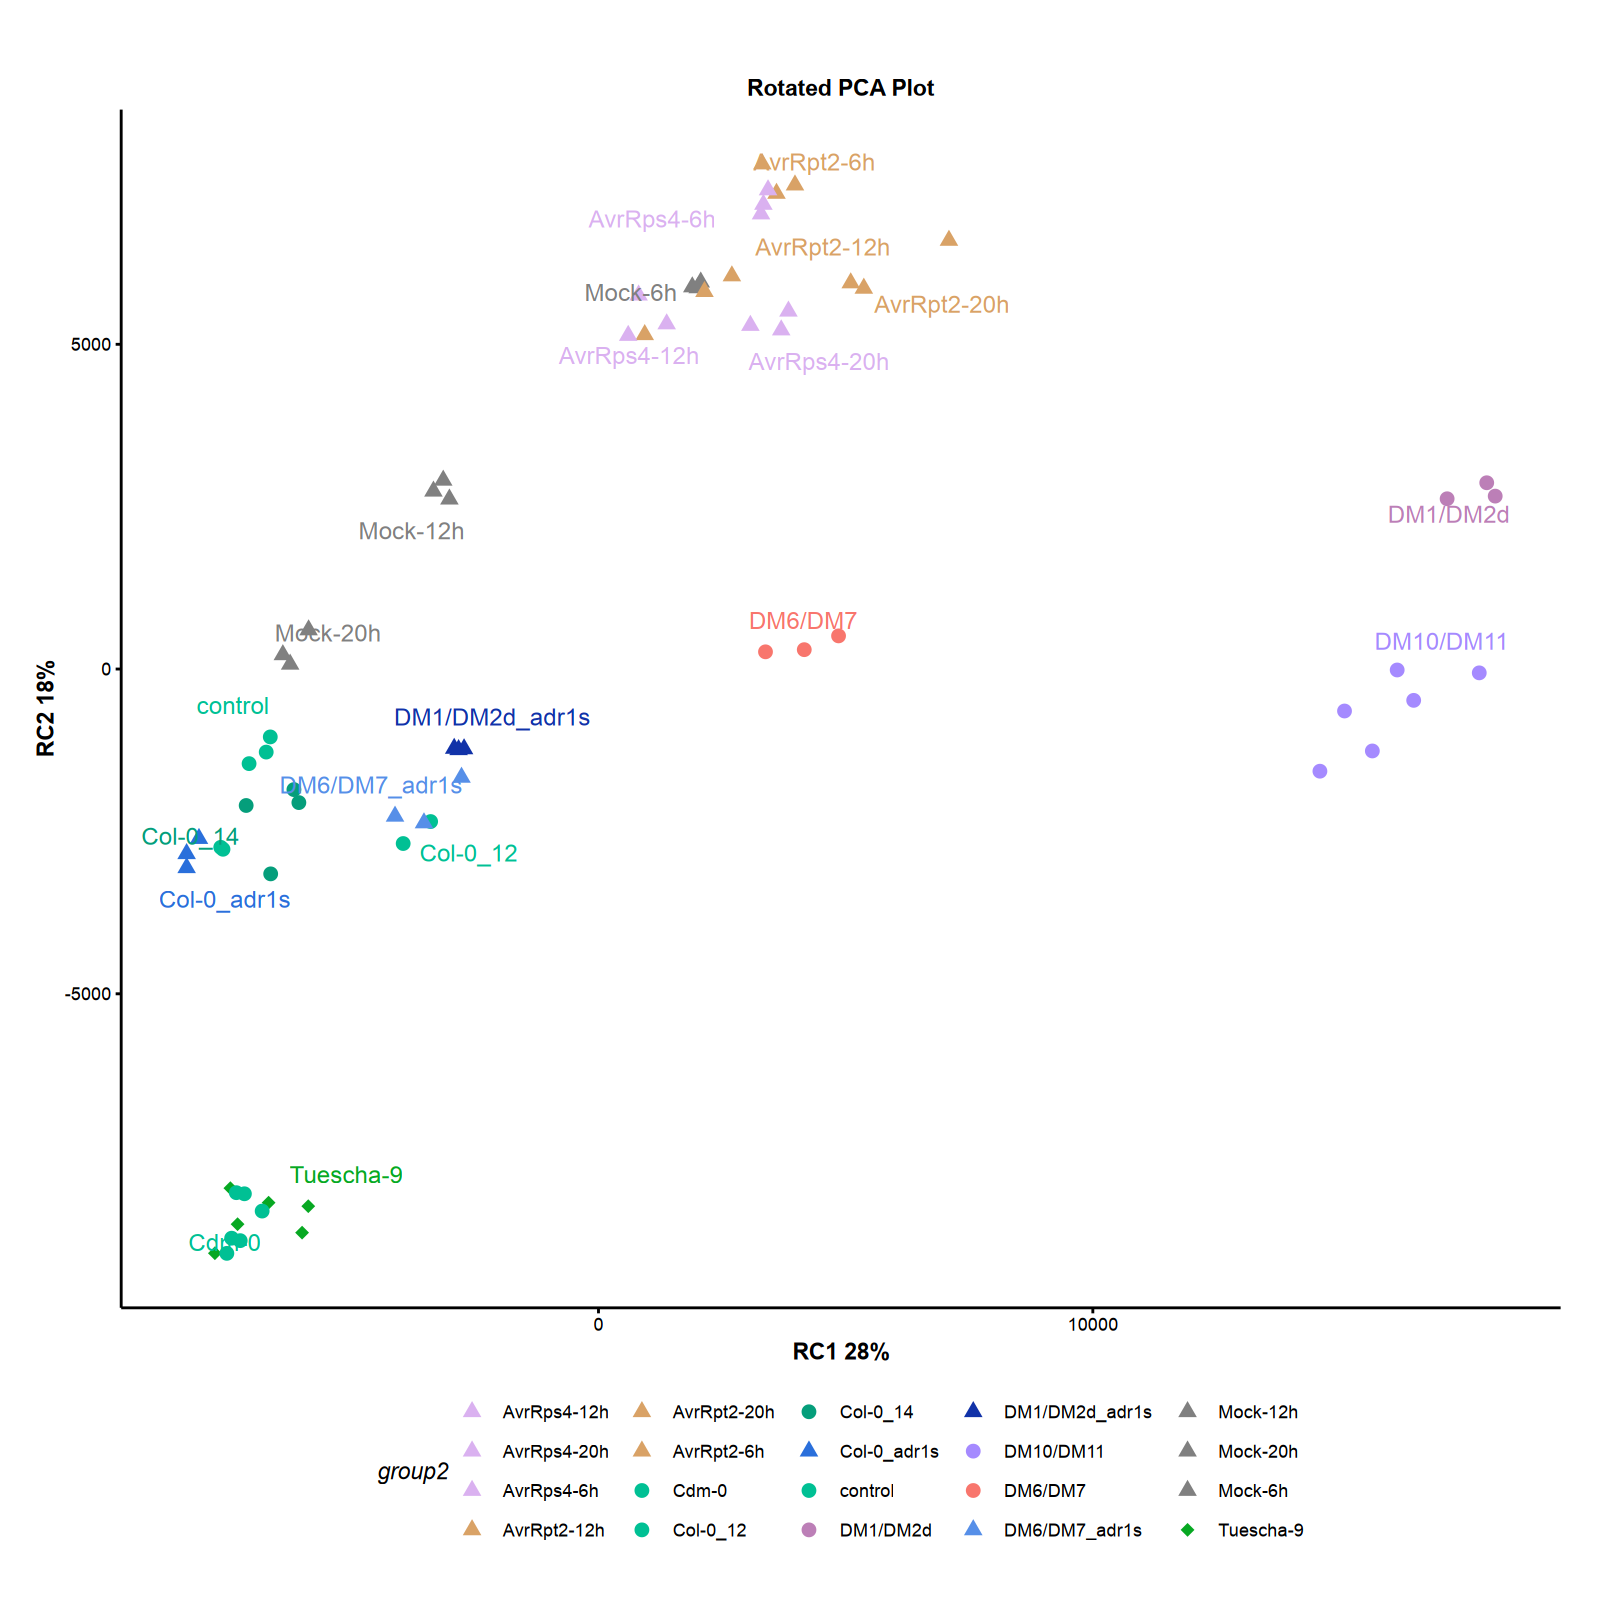

In [56]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=200)

custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#BC7FB7', #'#FB61D7', 
    'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#00C094', 'Col-0_14' = '#059e7b',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00C094',
  "control" = "#00C094",
  "Mock-6h" = "#808080", "Mock-12h" = "#808080", "Mock-20h" = "#808080", 
  # "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
      "AvrRps4-6h" = "#dab1f0", "AvrRps4-12h" = "#dab1f0", "AvrRps4-20h" = "#dab1f0", 
  # "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
      "AvrRpt2-6h" = "#d9a266", "AvrRpt2-12h" = "#d9a266", "AvrRpt2-20h" = "#d9a266",
  'DM6/DM7_adr1s' = '#568fe8', 'DM1/DM2d_adr1s' = '#1132a8', 'Col-0_adr1s' = '#2a6fdb'
)

custom_shapes <- c(
  "DM6/DM7" = 16, 'DM1/DM2d' = 16, 'DM10/DM11' = 16,
  'Col-0_12' = 16, 'Col-0_14' = 16,
  'Tuescha-9' = 18, 'Cdm-0' = 16,
  "control" = 16,
  "Mock-6h" = 17, "Mock-12h" = 17, "Mock-20h" = 17, 
  "AvrRps4-6h" = 17, "AvrRps4-12h" = 17, "AvrRps4-20h" = 17, 
  "AvrRpt2-6h" = 17, "AvrRpt2-12h" =17, "AvrRpt2-20h" = 17,
  'DM6/DM7_adr1s' = 17, 'DM1/DM2d_adr1s' = 17, 'Col-0_adr1s' = 17
)


pca_rotate_plot <- rotated_data_df %>% 
  ggplot(aes(x = PC1, y = PC2, color = group2, shape = group2, fill = group2)) +
  labs(
    title = "Rotated PCA Plot",
    x = "Rotated PC1",
    y = "Rotated PC2"
  ) + 
  geom_jitter(size = 2, width = 0.05) + 
  theme_Publication() +
  geom_label_repel(
    aes(label = group2), 
    data = label_data, 
    family = "Arial",  # Set font family to Arial
    size = 3, 
    fill = NA, 
    label.size = NA, 
    segment.color = NA, 
    show.legend = FALSE, 
    max.overlaps = 100
  ) +
  scale_shape_manual(values = custom_shapes, name = "group2") +
      scale_color_manual(values = custom_colors, name = "group2") +
  guides(

  ) +
  xlab(paste0("RC1 ", round(RC1_variance * 100), "%")) +
  ylab(paste0("RC2 ", round(RC2_variance * 100), "%")) +
  theme(legend.position = 'bottom')

pca_rotate_plot

# Save the plot
pca_rotate_plot %>%  ggsave(
    file = paste0("./plots/pca_rotate_plot", Sys.time(), ".pdf"),
    width = 6,
    height = 6.5
  )

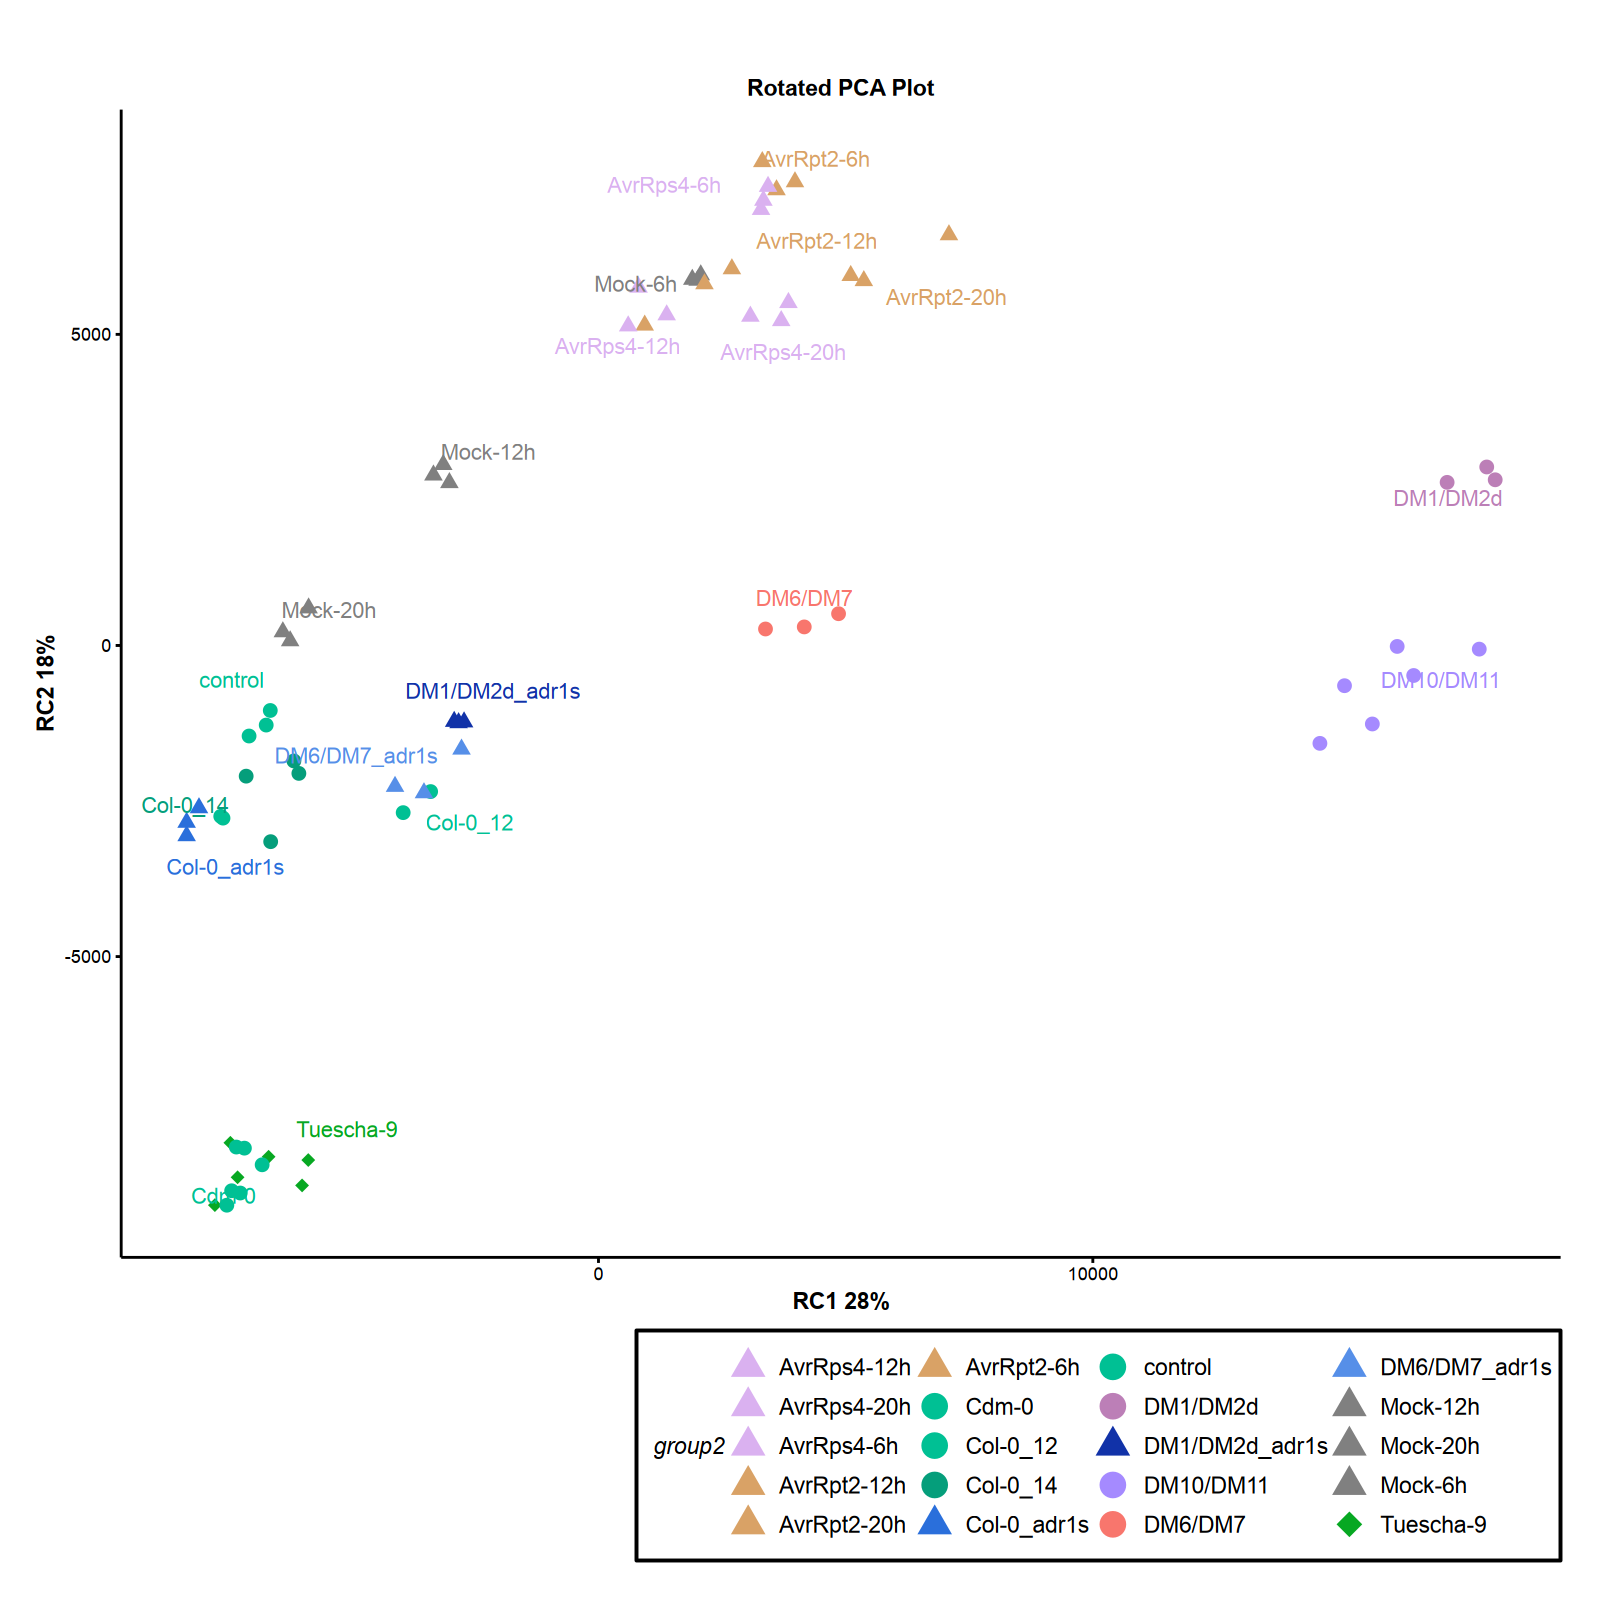

In [57]:
library(ggplot2)
library(ggrepel)

pca_rotate_plot <- rotated_data_df %>% 
  ggplot(aes(x = PC1, y = PC2, color = group2, shape = group2, fill = group2)) +
  labs(
    title = "Rotated PCA Plot",
    x = "Rotated PC1",
    y = "Rotated PC2"
  ) + 
  geom_jitter(size = 2, width = 0.05) + 
  theme_Publication(base_family = "Arial", base_size = 8) +
  geom_label_repel(
    aes(label = group2), 
    data = label_data, 
    family = "Arial",  
    size = 2.67,  # You might need to adjust this size to make it visually appropriate
    fill = NA, 
    label.size = NA, 
    segment.color = NA, 
    show.legend = FALSE, 
    max.overlaps = 100
  ) +
  scale_shape_manual(values = custom_shapes, name = "group2") +
  scale_color_manual(values = custom_colors, name = "group2") +
  guides(
    shape = guide_legend(nrow = 5, override.aes = list(size = 4)),  # Set number of rows for legend keys and adjust key size
    color = guide_legend(nrow = 5)  # Set number of rows for legend keys
  ) +
  theme(
    legend.position  = 'bottom', #c(.98, .02), 
    legend.justification = c(1, 0), 
    legend.box.just = "right",
    legend.margin = margin(6,6,6,6),
    legend.text = element_text(size = 8),  # Set font size for legend text
    legend.background = element_rect(fill = "transparent", colour = "black", size = 0.5),
    legend.key = element_rect(fill = "transparent", colour = "transparent")
  ) +
  xlab(paste0("RC1 ", round(RC1_variance * 100), "%")) +
  ylab(paste0("RC2 ", round(RC2_variance * 100), "%"))

# Print the plot
pca_rotate_plot

# Save the plot
ggsave(
  filename = paste0("./plots/pca_rotate_plot", Sys.time(), ".pdf"),
  plot = pca_rotate_plot,
  width = 6.6,
  height = 6
)


In [58]:
# Save the plot
ggsave(
  filename = paste0("./plots/pca_rotate_plot", Sys.time(), ".pdf"),
  plot = pca_rotate_plot,
  width = 4.5,
  height = 5.5
)

In [59]:
dds <- estimateSizeFactors(dds)
counts_normalized <- DESeq2::counts(dds, normalized=TRUE)  %>% as.data.frame %>% 
    tibble::rownames_to_column(var = "AGI") 

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [60]:
mean_sd_count <- counts_normalized %>%
  pivot_longer(cols = -AGI, names_to = 'sample', values_to = 'count') %>% 
  left_join(sample_data %>% dplyr::select(short_name, group), by = c('sample' = 'short_name')) %>%
  group_by(AGI, group) %>% 
  summarise(mean_count = mean(count),
            sd = sd(count))
mean_sd_count <- mean_sd_count %>% left_join(map_id_name, by = c('AGI' = 'gene_id'))

`summarise()` has grouped output by 'AGI'. You can override using the `.groups`
argument.


In [61]:
mean_sd_count <- mean_sd_count %>% mutate(background = case_when(
  group %>% str_detect('Avr') ~ "Col-0",
  group %>% str_detect('Mock') ~ "Col-0",
  group %>% str_detect('control') ~ "Col-0",
  group %>% str_detect('Col') ~ "Col-0",
  group %>% str_detect('DM1/DM2d') ~ "DM1/DM2d",
  group %>% str_detect('DM6/DM7') ~ "DM6/DM7",
  group %>% str_detect('DM11') ~ "DM10/DM11"
    ))

In [62]:
mean_sd_count %>% pull(group) %>% unique

[1] "AvrRps4-12h"       "AvrRps4-20h"       "AvrRps4-6h"       
 [4] "AvrRpt2-12h"       "AvrRpt2-20h"       "AvrRpt2-6h"       
 [7] "Col-0_12"          "Col-0_12_2"        "Col-0_14"         
[10] "Col-0_adr1s"       "DM1/DM2d"          "DM1/DM2d_adr1s"   
[13] "DM10/DM11"         "DM6/DM7"           "DM6/DM7_adr1s"    
[16] "Mock-12h"          "Mock-20h"          "Mock-6h"          
[19] "Parents_DM10_DM11" "control"

In [63]:
library(dplyr)

mean_sd_count <- mean_sd_count %>%
  mutate(group = factor(group, levels = c('Mock-6h','Mock-12h','Mock-20h','AvrRps4-6h','AvrRps4-12h','AvrRps4-20h','AvrRpt2-6h','AvrRpt2-12h','AvrRpt2-20h','Col-0_12','Col-0_14','Col-0_adr1s','control','DM1/DM2d','DM1/DM2d_adr1s','DM6/DM7','DM6/DM7_adr1s','DM10/DM11','Parents_DM10_DM11')))


In [64]:
create_bar_plot <- function(df, AGI) {
  df_filtered <- df %>%
    filter(AGI == !!AGI)

  ggplot(df_filtered, aes(x = group, y = mean_count, fill = group)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    geom_errorbar(aes(ymin = mean_count - sd, ymax = mean_count + sd), width = 0.2, position = position_dodge(0.9)) +
    theme_minimal() +
    scale_fill_manual(values = custom_colors) +
    labs(x = "Group", y = "Mean Count", title = paste("Bar Plot with Error Bars for AGI", AGI)) +
    theme(legend.position = 'bottom',
          axis.text.x = element_text(angle = 45, hjust = 1)) 
}

# Replace "AT1G01010" with the desired AGI
create_bar_plot(mean_sd_count , "AT1G33560") %>% ggsave(file = paste0('./plots/', 'count_barplot-', Sys.time(), '.pdf'), height = 12, width = 8.3)


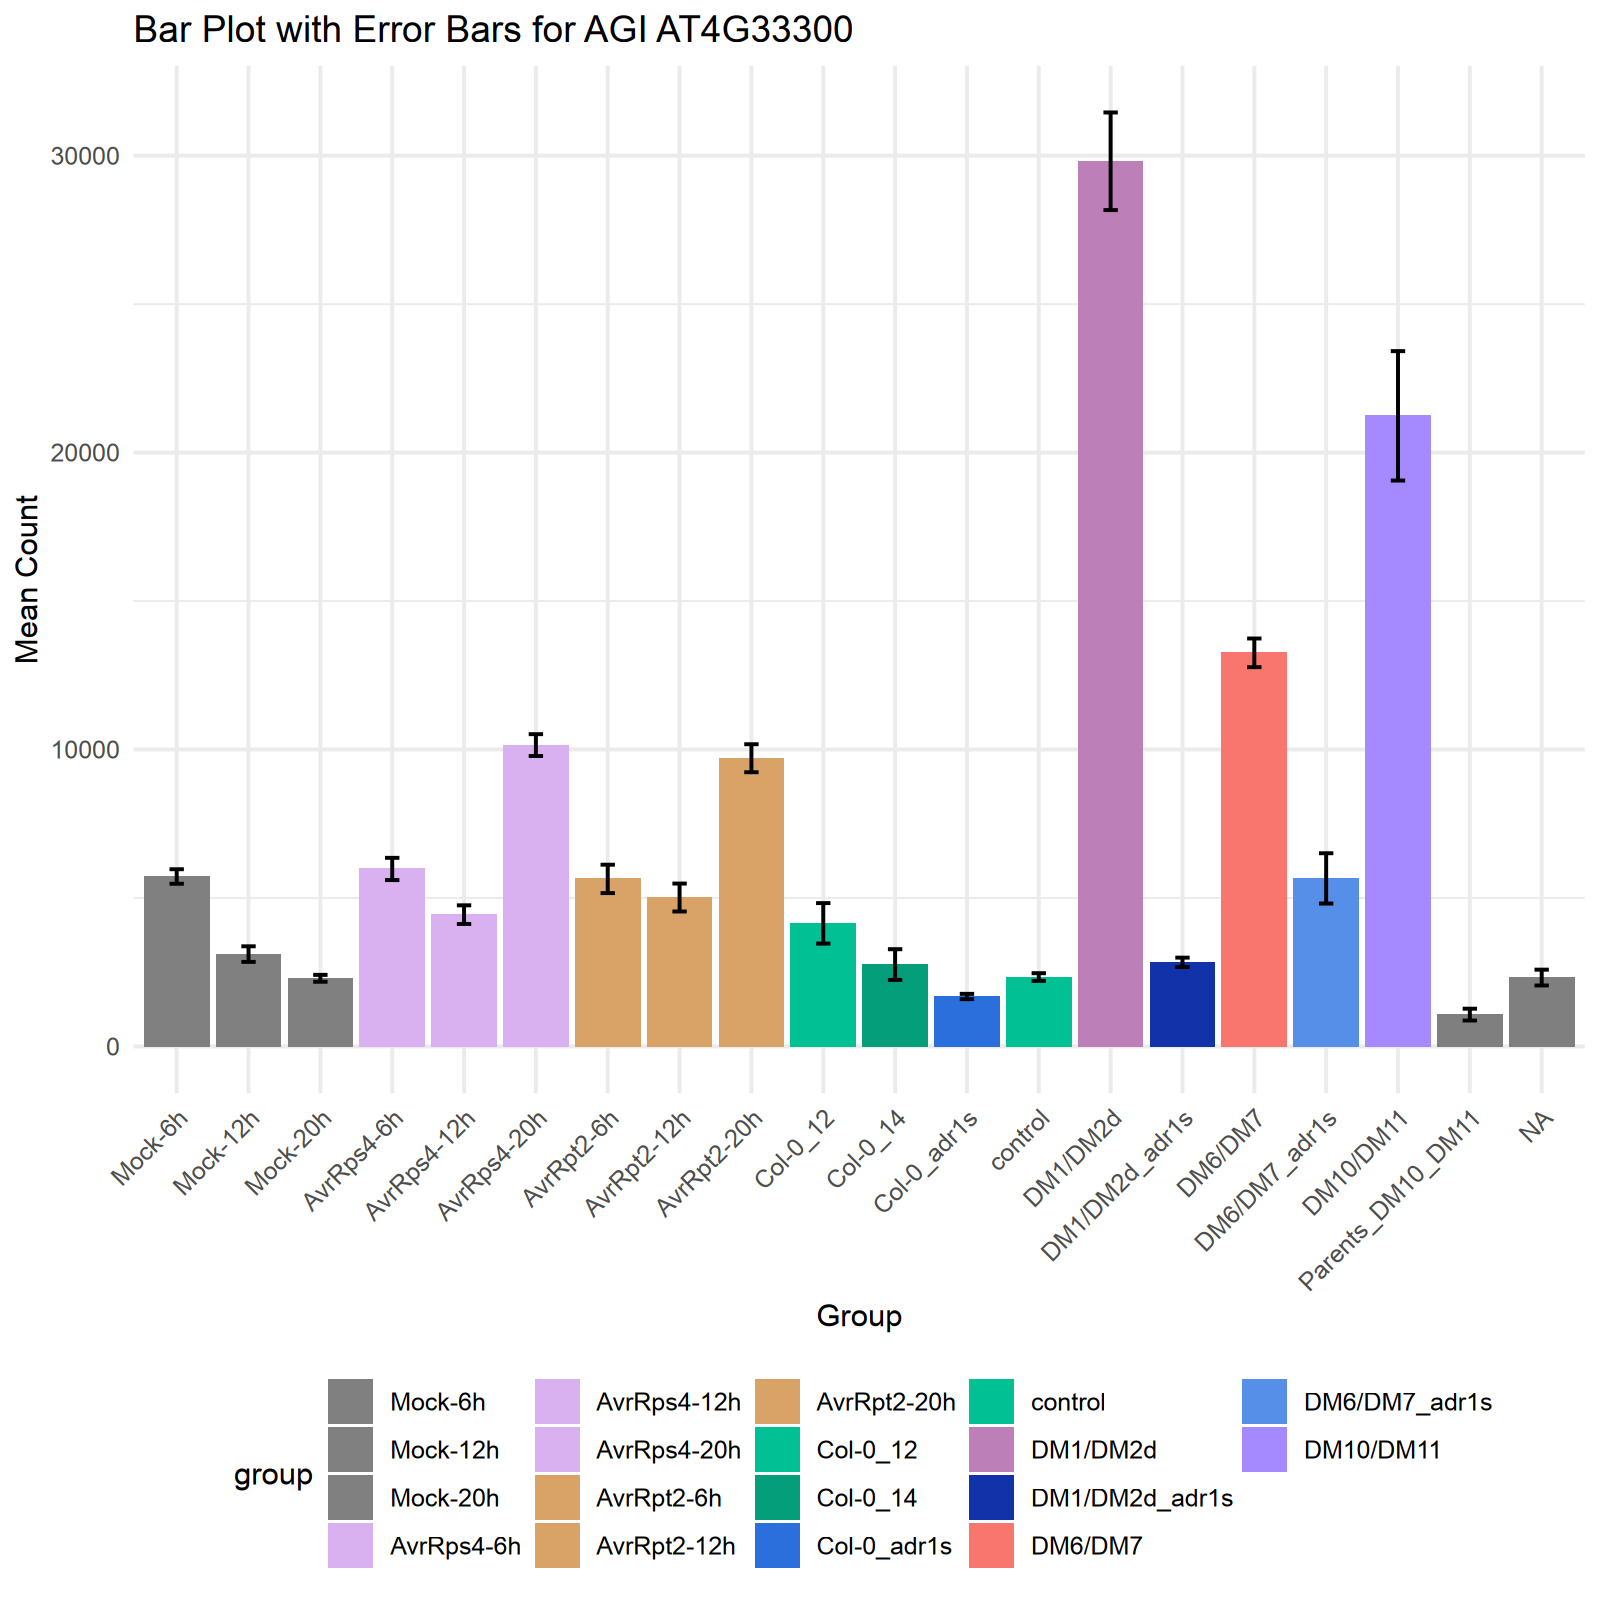

In [65]:
create_bar_plot <- function(df, AGI) {
  df_filtered <- df %>%
    filter(AGI == !!AGI)

  ggplot(df_filtered, aes(x = group, y = mean_count, fill = group)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    geom_errorbar(aes(ymin = mean_count - sd, ymax = mean_count + sd), width = 0.2, position = position_dodge(0.9)) +
    theme_minimal() +
    scale_fill_manual(values = custom_colors) +
    labs(x = "Group", y = "Mean Count", title = paste("Bar Plot with Error Bars for AGI", AGI)) +
    theme(legend.position = 'bottom',
          axis.text.x = element_text(angle = 45, hjust = 1)) 
}

# Replace "AT1G01010" with the desired AGI
create_bar_plot(mean_sd_count , "AT4G33300") #ADR1-L1


# NLRs

In [66]:
counts_fill_color <- c("DM6/DM7" = "#EDC5BF", 'DM1/DM2d' = '#C894B8', 
                               'DM10/DM11' = '#D1CDE6',  
                               'DM6/DM7_adr1s' = '#31a354' , 'Col-0_12' = '#5c6ee0',
                               'DM1/DM2d_adr1s' = '#31a354', 'Col-0_adr1s' = '#31a354')

In [67]:
counts_fill_color <- c("DM6/DM7" = "#EDC5BF", 'DM1/DM2d' = '#C894B8', 
                               'DM10/DM11' = '#D1CDE6',  
                               'DM6/DM7_adr1s' = '#5c6ee0' , 'Col-0_12' = '#31a354',
                               'DM1/DM2d_adr1s' = '#5c6ee0', 'Col-0_adr1s' = '#5c6ee0')

In [68]:
NLRs_table <- openxlsx::read.xlsx('../gene_table_and_other_scripts//NLRs_167.xlsx') 
NLRs_table <- NLRs_table %>% dplyr::select(AGI, Class, Organization, Symbol) #%>% dplyr::rename('GeneFamily' = 'Class')

In [69]:
NLRs_counts <- mean_sd_count %>% right_join(NLRs_table, by = 'AGI')

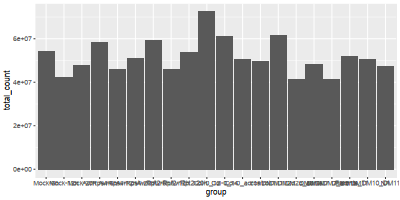

In [70]:
options(repr.plot.width= 8, repr.plot.height=4, repr.plot.res = 50)
mean_sd_count %>% group_by(group) %>% summarise(total_count = sum(mean_count)) %>% 
    ggplot(aes(x= group, y = total_count) ) + geom_bar(stat = 'identity')

In [71]:
groups_to_plot <- c('Col-0_12', 'Col-0_adr1s', 'DM1/DM2d', 'DM1/DM2d_adr1s', 'DM6/DM7', 'DM6/DM7_adr1s')

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


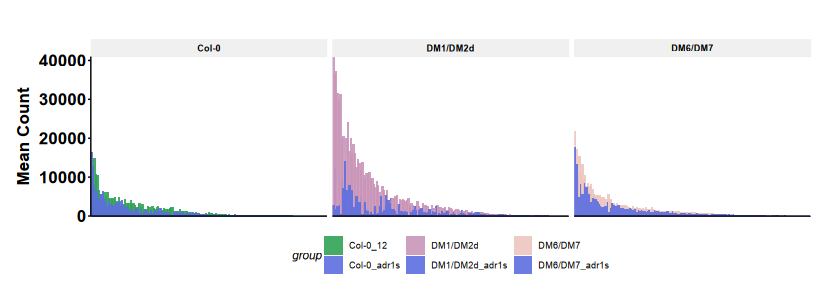

In [72]:
options(repr.plot.width= 8.3 , repr.plot.height=3, repr.plot.res = 100)

NLRs_counts1 <- NLRs_counts %>% filter(group %in% groups_to_plot)

bar_profile <- ggplot(NLRs_counts1, aes(x = reorder(interaction(AGI, background), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +
  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  facet_grid(cols = vars(background), scales = "free_x", space = "free_x") +
  scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


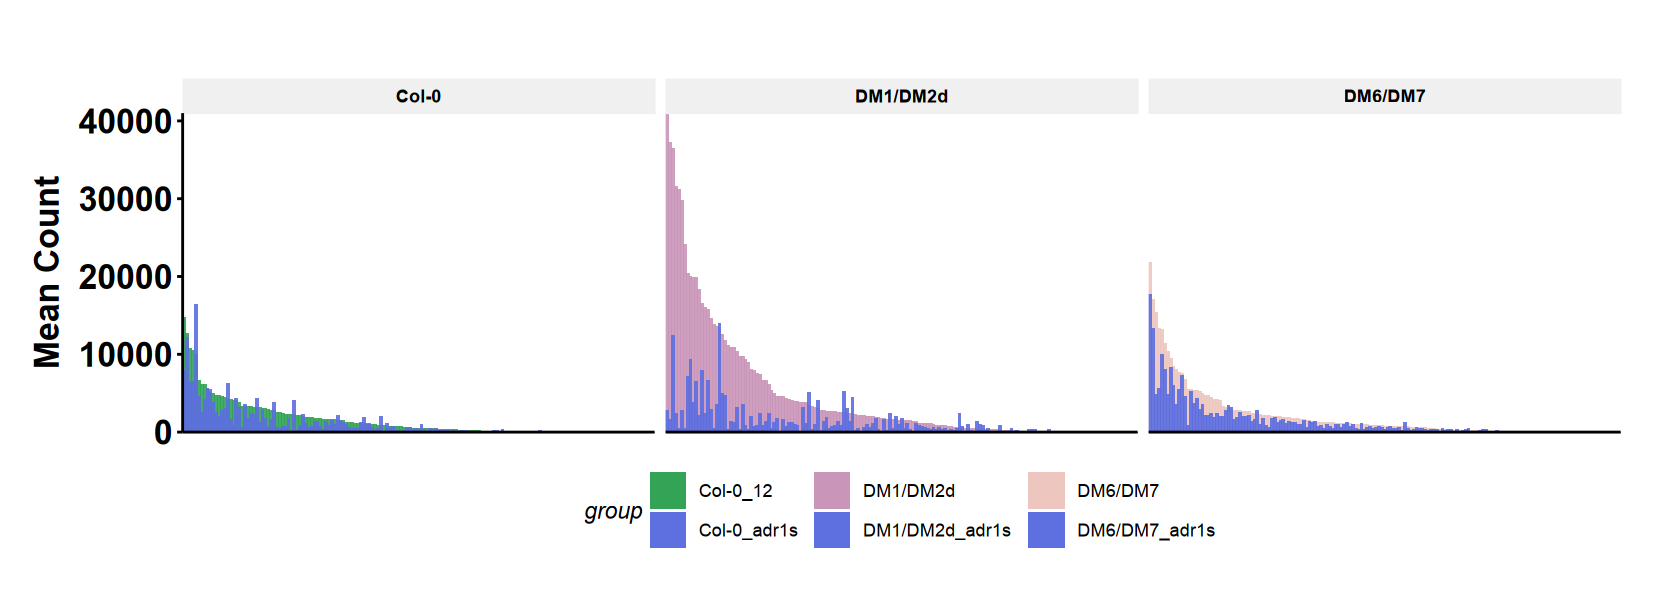

In [73]:
options(repr.plot.width= 8.3 , repr.plot.height=3, repr.plot.res = 200)

NLRs_counts1 <- NLRs_counts %>% filter(group %in% groups_to_plot)

bar_profile <- ggplot(NLRs_counts1 %>% filter(group %>% str_detect('adr1', neg = TRUE)), aes(x = reorder(interaction(AGI, background), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

    geom_bar(data = NLRs_counts1 %>% filter(group %>% str_detect('adr1')), stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  facet_grid(cols = vars(background), scales = "free_x", space = "free_x") +
  scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


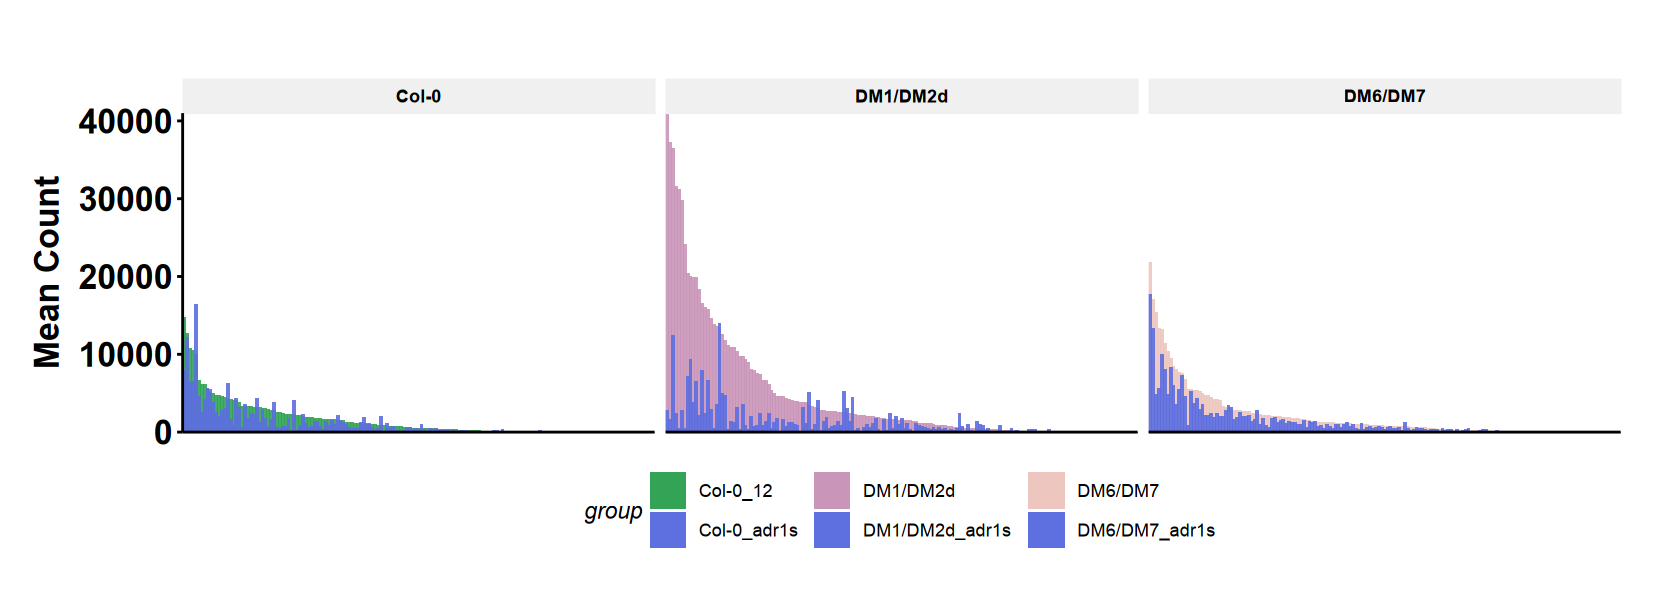

In [74]:
options(repr.plot.width= 8.3 , repr.plot.height=3, repr.plot.res = 200)

NLRs_counts1 <- NLRs_counts %>% filter(group %in% groups_to_plot)

bar_profile <- ggplot(NLRs_counts1 %>% filter(group %>% str_detect('adr1', neg = TRUE)), aes(x = reorder(interaction(AGI, background), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

    geom_bar(data = NLRs_counts1 %>% filter(group %>% str_detect('adr1')), stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  facet_grid(cols = vars(background), scales = "free_x", space = "free_x") +
  scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


In [75]:
NLRs_counts2 <- NLRs_counts %>% filter(group %in% c('Col-0_12', 'Col-0_14', 'DM1/DM2d',  'DM6/DM7'))
NLRs_counts2 <- NLRs_counts2 %>% mutate(group2 = case_when(group == 'DM1/DM2d' ~ '12DAG',
                                           group == 'Col-0_12' ~ '12DAG',
                                           group == 'Col-0_14' ~ '14DAG',
                                           group == 'DM6/DM7' ~ '14DAG'))

In [76]:
NLRs_counts2 %>% filter(group %>% str_detect('Col'))

AGI,group,mean_count,sd,gene_name,background,Class,Organization,Symbol,group2
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AT1G10920,Col-0_12,633.671807,53.442708,LOV1,Col-0,NBS-LRR,singleton,LOV1,12DAG
AT1G10920,Col-0_14,549.800217,78.518600,LOV1,Col-0,NBS-LRR,singleton,LOV1,14DAG
AT1G12210,Col-0_12,64.764029,1.039556,RFL1,Col-0,CC-NBS-LRR,clustered,RFL1,12DAG
AT1G12210,Col-0_14,13.363112,6.968780,RFL1,Col-0,CC-NBS-LRR,clustered,RFL1,14DAG
AT1G12220,Col-0_12,444.200132,29.489542,RPS5,Col-0,CC-NBS-LRR,clustered,RPS5,12DAG
AT1G12220,Col-0_14,353.211985,72.633891,RPS5,Col-0,CC-NBS-LRR,clustered,RPS5,14DAG
AT1G12280,Col-0_12,419.527590,17.828639,SUMM2,Col-0,CC-NBS-LRR,NA,SUMM2,12DAG
AT1G12280,Col-0_14,477.969035,66.158915,SUMM2,Col-0,CC-NBS-LRR,NA,SUMM2,14DAG
AT1G12290,Col-0_12,130.988511,10.152960,AT1G12290,Col-0,CC-NBS-LRR,clustered,L5,12DAG


`summarise()` has grouped output by 'AGI'. You can override using the `.groups`
argument.


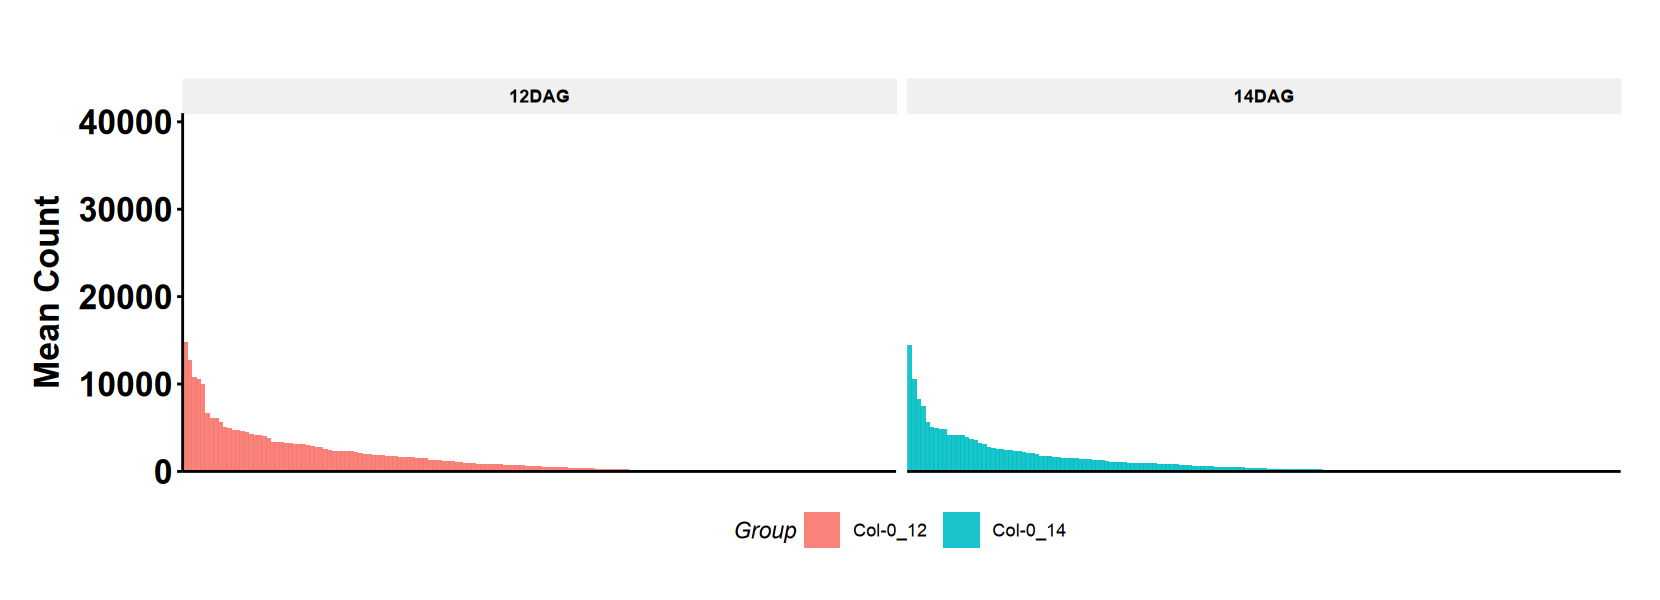

In [77]:
options(repr.plot.width= 8.3 , repr.plot.height=3, repr.plot.res = 200)

NLRs_counts_ordered <- NLRs_counts2 %>%
  group_by(AGI, group) %>%
  summarise(mean_count = mean(mean_count)) %>%
  mutate(ordering = order(-mean_count)) %>%
  ungroup()

bar_profile <- ggplot(NLRs_counts2 %>% filter(group %>% str_detect('Col')), aes(x = reorder(interaction(AGI, group), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
    facet_wrap(~ group2, ncol = 2, scales = "free_x") +
  # scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


`summarise()` has grouped output by 'AGI'. You can override using the `.groups`
argument.


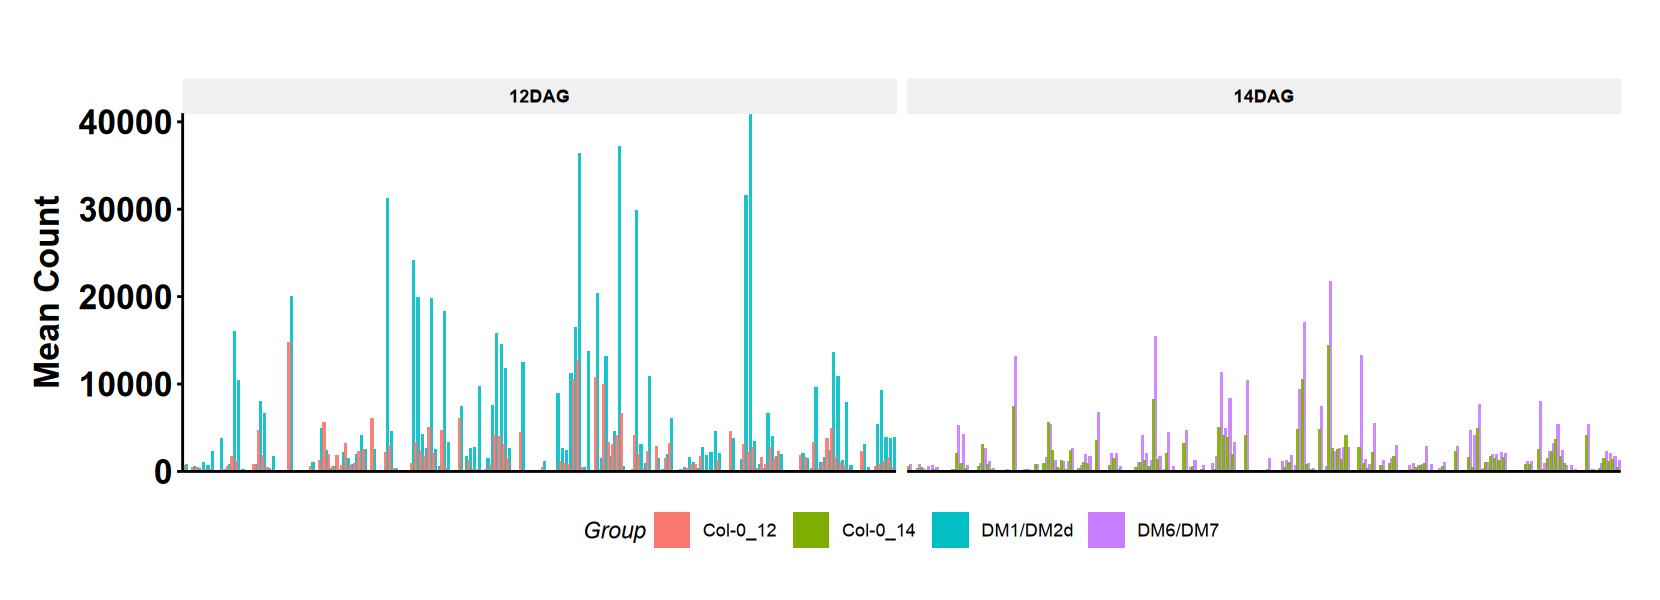

In [78]:
options(repr.plot.width= 8.3 , repr.plot.height=3, repr.plot.res = 200)

NLRs_counts_ordered <- NLRs_counts2 %>%
  group_by(AGI, group) %>%
  summarise(mean_count = mean(mean_count)) %>%
  mutate(ordering = order(-mean_count)) %>%
  ungroup()

bar_profile <- ggplot(NLRs_counts2 %>% filter(group %>% str_detect('DM')), aes(x = reorder(interaction(AGI, group), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

    geom_bar(data = NLRs_counts2 %>% filter(group %>% str_detect('Col')), stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
    facet_wrap(~ group2, ncol = 2, scales = "free_x") +
  # scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


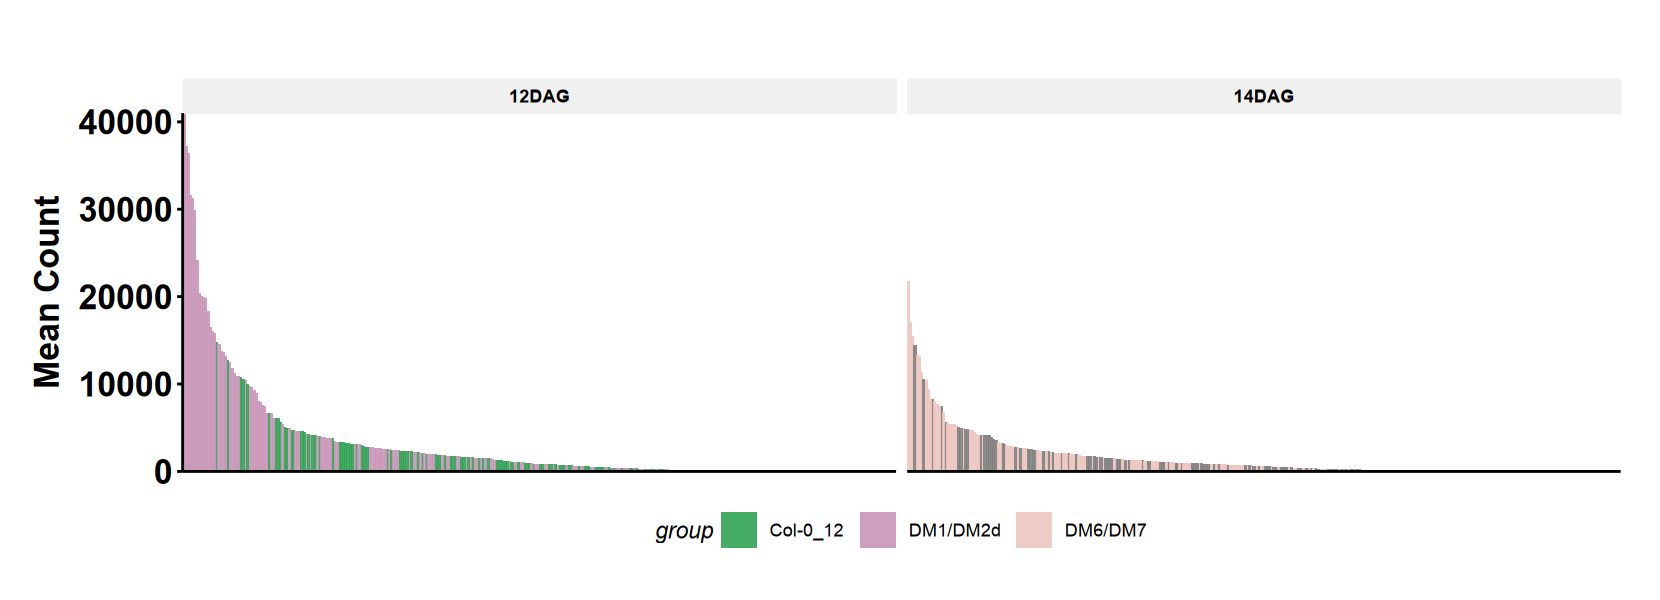

In [79]:
library(tidytext)

bar_profile <- ggplot(NLRs_counts2, aes(x = reorder_within(interaction(AGI, group), -mean_count, group2), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity", alpha = 0.9,
           width = 1) +
  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  facet_wrap(~ group2, ncol = 2, scales = "free_x") +
  scale_fill_manual(values = counts_fill_color) +
  theme_Publication() + coord_cartesian(ylim = c(0, 41000)) +
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
  theme(axis.text = element_text(size = 12, face = "bold"),
        axis.title = element_text(size = 12, face = "bold"),
        axis.title.x = element_blank()) +
  scale_x_reordered() # This line adds the reordering

bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


In [80]:
counts_fill_color

DM6/DM7       DM1/DM2d      DM10/DM11  DM6/DM7_adr1s       Col-0_12 
     "#EDC5BF"      "#C894B8"      "#D1CDE6"      "#5c6ee0"      "#31a354" 
DM1/DM2d_adr1s    Col-0_adr1s 
     "#5c6ee0"      "#5c6ee0"

In [81]:
NLRs_counts_Avr <- NLRs_counts %>% filter(group %>% str_detect('Avr|Mock'))

In [82]:
NLRs_counts_Avr %>% ungroup %>% sample_n(60)

AGI,group,mean_count,sd,gene_name,background,Class,Organization,Symbol
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
AT1G56510,AvrRpt2-20h,1.951865e+03,135.6251182,WRR4,Col-0,TIR-NBS-LRR,clustered,WRR4
AT4G16860,AvrRps4-20h,4.780609e+03,213.7271315,RPP4,Col-0,TIR-NBS-LRR,clustered,RPP4
AT5G49140,AvrRps4-6h,0.000000e+00,0.0000000,AT5G49140,Col-0,TIR-NBS-LRR,NA,AT5G49140
AT4G36140,AvrRpt2-20h,2.775193e+03,280.5239602,AT4G36140,Col-0,TIR-NBS-LRR,clustered,AT4G36140
AT5G18360,Mock-20h,9.101727e+01,37.2924253,AT5G18360,Col-0,TIR-NBS-LRR,clustered,BAR1
AT5G46520,AvrRps4-6h,2.800044e+02,13.7337247,AT5G46520,Col-0,TIR-NBS-LRR,clustered,ACQOS
AT5G41740,AvrRps4-12h,1.938867e+03,61.9735346,AT5G41740,Col-0,TIR-NBS-LRR,clustered,AT5G41740
AT3G51570,Mock-6h,0.000000e+00,0.0000000,AT3G51570,Col-0,TIR-NBS-LRR,NA,AT3G51570
AT1G57650,Mock-20h,5.933431e+01,12.3807708,AT1G57650,Col-0,NBS-LRR,clustered,AT1G57650


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


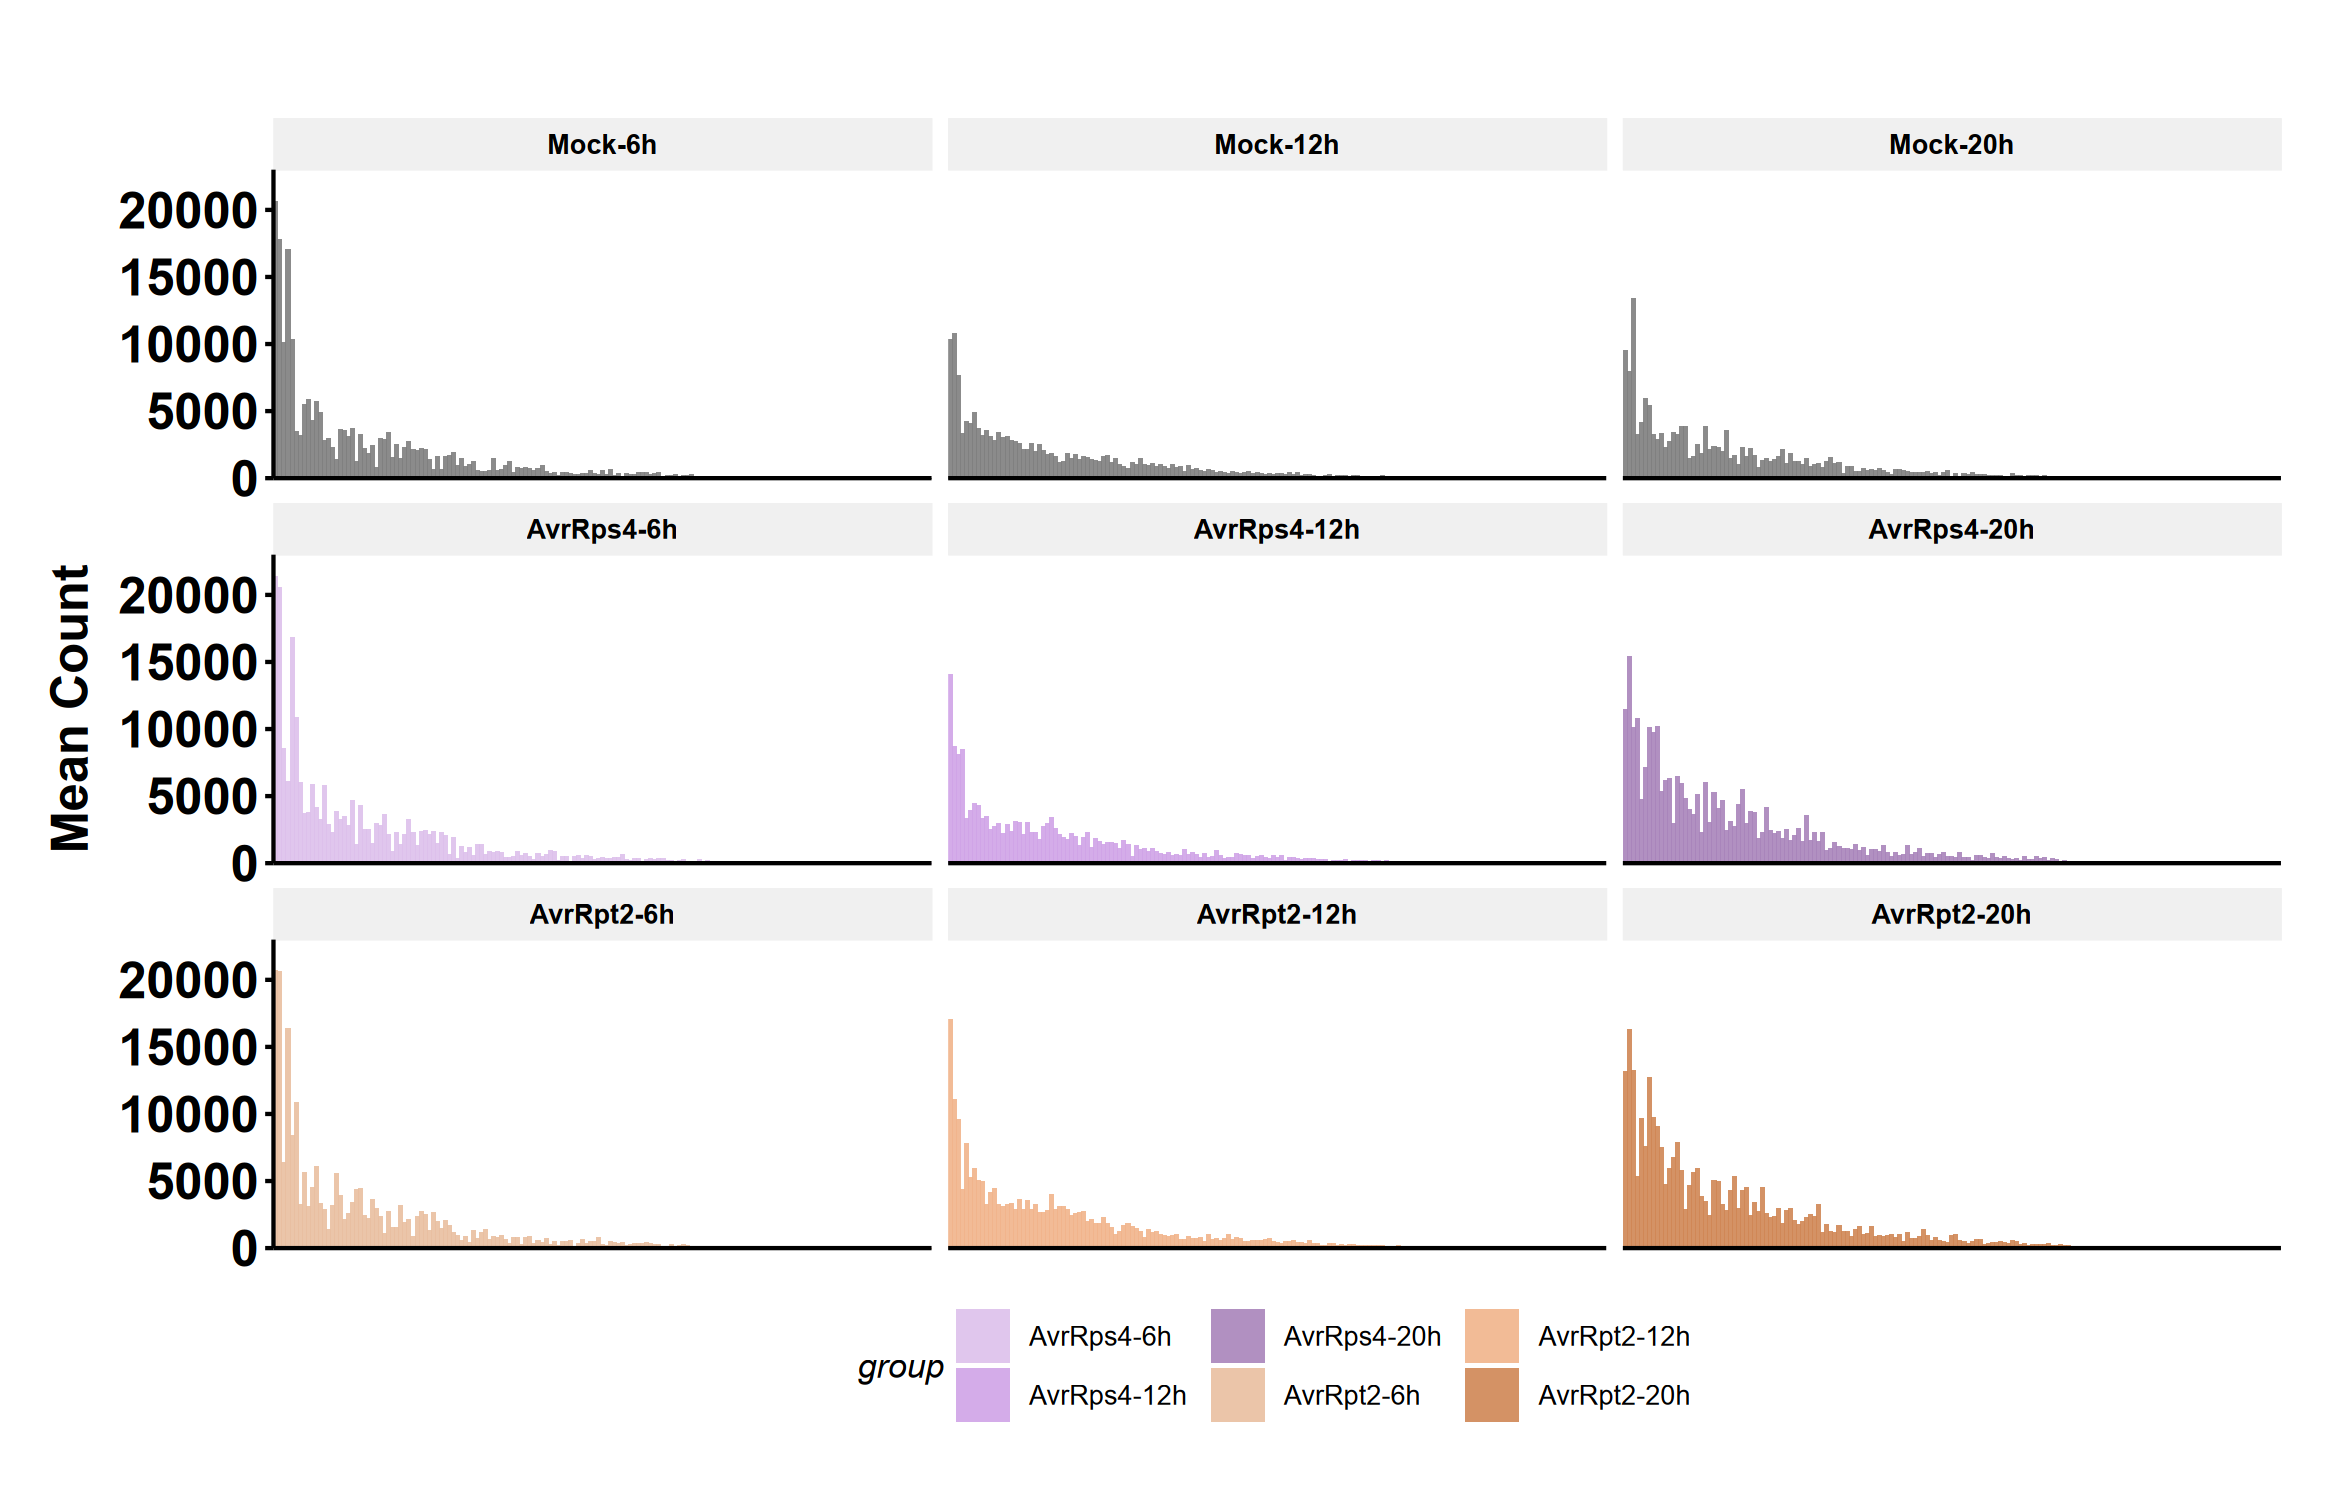

In [83]:
width_ = 7.8
height_ = 5
options(repr.plot.width= width_, repr.plot.height= height_, repr.plot.res = 300)

# NLRs_counts_Avr <- NLRs_counts %>% filter(group %>% str_detect('Avr'))
NLRs_counts_Avr <- NLRs_counts_Avr %>% mutate(treatment = group %>% str_remove('-\\d{1,2}h$'))

bar_profile <- ggplot(NLRs_counts_Avr, aes(x = reorder(interaction(AGI, treatment), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +
  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  # facet_grid(cols = vars(group), scales = "free_x", space = "free_x") +
facet_wrap(~ group, ncol = 3, scales = "free_x") +
  scale_fill_manual(values = c(      "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#cfa3e6", "AvrRps4-20h" = "#a884ba", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#cf8655")) +
    theme_Publication() + coord_cartesian(ylim=c(0, 23000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = height_, width = width_)


In [84]:
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.jpeg'), height = 3, width = 8.2)

# Bar plot of NLRs

In [85]:
library(glue)
library(ggtext)
library(ggh4x)
library(ggbreak) 


Attaching package: ‘glue’


The following object is masked from ‘package:SummarizedExperiment’:

    trim


The following object is masked from ‘package:GenomicRanges’:

    trim


The following object is masked from ‘package:IRanges’:

    trim




ERROR: Error in library(ggbreak): there is no package called ‘ggbreak’


### choose significantly changed NLRs

In [ ]:
Res_combined <-  readRDS('../Pathway_plot/Rdata/Res_combined.rds')

sig_NLRs <- Res_combined %>% filter(source %in% groups_to_plot ) %>% right_join(NLRs_table, by = 'AGI') %>%
    filter(abs(log2FC ) > 1)  %>% pull(AGI) %>% unique 
sig_NLRs %>% length

### make color markdown

In [ ]:
cols_text <- c( 'TIR-NBS-LRR' =  "#386cb0",
          'TIR'= "#a6cee3", "TIR-NBS" = "#2581ba",
          
          "CC-NBS-LRR" = "#fdb462",'CC-NBS' =  "#fb9a99", 'RPW8-NBS-LRR' = "#984ea3",
          
          'NBS-LRR' = "#b3b330",
          'P-loop' = "#7fc97f"
         )
cols_text_2 <- cols_text %>% as.data.frame() %>%  tibble::rownames_to_column("Class") %>% dplyr::rename(label_color = 2)

In [ ]:
sigNLRs_counts <- NLRs_counts %>% filter(AGI %in% sig_NLRs) 

In [ ]:
sigNLRs_counts <- sigNLRs_counts %>% group_by(AGI) %>%
  filter(any(mean_count > 10)) %>% ungroup()

In [ ]:
sigNLRs_counts <- sigNLRs_counts %>% 
    mutate(plot_label = paste0(Symbol, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') ) %>% 
    left_join(cols_text_2, by = 'Class')  

In [ ]:
# Extract plot_label and label_color from Res_NLRs_up
plot_label_color <- sigNLRs_counts %>% dplyr::select(plot_label, label_color)

# Create a named list with label_color as content and plot_label as names
color_list <- setNames(as.list(plot_label_color$label_color), plot_label_color$plot_label)


In [ ]:
NLRs_color <- sigNLRs_counts %>% mutate(label_color_markdown =
        glue("<i style='color: {color_list[plot_label]}'>{plot_label}</i>")) 


In [ ]:
NLRs_color_max <- NLRs_color  %>% arrange( -mean_count)  %>% group_by(AGI) %>% slice_head(n=1) %>% ungroup %>%
    arrange(mean_count)

In [ ]:
NLRs_color_min <- NLRs_color  %>% arrange(mean_count)  %>% group_by(AGI) %>% slice_head(n=1) %>% ungroup %>%
    arrange(mean_count)

In [ ]:
NLRs_color_Col <- NLRs_color  %>% filter(group == 'Col-0_12') %>% arrange(mean_count)

In [ ]:
library(purrr)
NLRs_color_temp <- NLRs_color %>% arrange(desc(mean_count))
layers <- list()

# Step 3: Iterate until there are no rows left in over0 and below0
layer_num <- 1
while (nrow(NLRs_color_temp) > 0) {
    current_max_NLR <- NLRs_color_temp %>% group_by( AGI) %>% slice_max(mean_count)
    NLRs_color_temp <- suppressMessages(anti_join(NLRs_color_temp, current_max_NLR))
    layers[[layer_num]] <- current_max_NLR
    layer_num <- layer_num + 1
}

# TIR_only

In [ ]:
TIR_only <- readxl::read_excel("../gene_table_and_other_scripts/Col-0 TIR domains from WanLi.xlsx") 

In [ ]:
TIR_only <- TIR_only %>% dplyr::select(AGI) %>% left_join(mean_sd_count, by ='AGI')

In [ ]:
TIR_only 

In [ ]:
NLRs_in_connectivity_table <- read.csv('./WGCNA_output_all/NLRs_in_connectivity_table.csv') 

In [ ]:
library(purrr)


In [ ]:
options(repr.plot.width= 8, repr.plot.height=11, repr.plot.res = 100)

create_barplot <- function(NLRs_color) {

  NLRs_color_temp <- NLRs_color %>% arrange(desc(mean_count))
  layers <- list()

  layer_num <- 1
  while (nrow(NLRs_color_temp) > 0) {
      current_max_NLR <- NLRs_color_temp %>% group_by(AGI) %>% slice_max(mean_count)
      NLRs_color_temp <- suppressMessages(anti_join(NLRs_color_temp, current_max_NLR))
      layers[[layer_num]] <- current_max_NLR
      layer_num <- layer_num + 1
  }

  NLRs_plot_base <- NLRs_color %>% ggplot(aes(x = label_color_markdown,
                                              fill = group, 
                                              y = mean_count, label = label_color_markdown)) +
      labs(y = "mean_count") +
      coord_flip() +
      guides(fill = guide_legend(reverse = TRUE, nrow = 2)) +
      scale_y_continuous(expand = c(0, 0), 
                         breaks = c(0, 20000, 40000), 
                         limits = c(0, 41000), 
                         oob = scales::squish) +
      scale_fill_manual(values = counts_fill_color)+
      theme_Publication() +
      theme(axis.text = element_text(size = 10, face = "bold"),
            axis.title = element_text(size = 12, face = "bold"),
            axis.title.y = element_blank()) +
      theme(text = element_text(size = 12, family = "sans", face = 'bold')) +
      facet_grid(rows = vars(Class), cols = vars(background),
                  scales = "free",    space = "free") +
      theme(axis.text.y = element_markdown())   +
      geom_bar(data = NLRs_color_max, aes(x = reorder(label_color_markdown, mean_count)),
               position = "identity",  stat = 'identity', 
               aes(fill = group), width = .8,  alpha = 0 ) 

  bar_NLRs <- reduce(layers, function(plot, layer) {
    plot +
      geom_bar(data = layer,
               position = "identity",
               stat = 'identity',
               width = .8,
               alpha = 0.8)
  }, .init = NLRs_plot_base)

  return(bar_NLRs)
}

# Assuming NLRs_color is your data frame
resulting_plot <- create_barplot(NLRs_color %>% filter(AGI %in% NLRs_in_connectivity_table$gene))
resulting_plot

# bar_NLRs %>% ggsave(file = paste0('./plots/', 'count_barplot-', Sys.time(), '.pdf'), height = 16, width = 8.3)
